In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import utils
from tqdm import tqdm

In [2]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [3]:
BATCH_START = 0
TIME_STEPS = 20
INPUT_SIZE = 1
OUTPUT_SIZE = 1
BATCH_SIZE = 50
CELL_SIZE = 20
LR = 0.001

model = tf.keras.models.Sequential()

model.add(layers.LSTM(CELL_SIZE,
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    return_sequences=True,      # True: output at all steps. False: output as last step.
    stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
))

model.add(layers.TimeDistributed(layers.Dense(OUTPUT_SIZE)))

model.compile(optimizer = 'adam', loss = 'mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


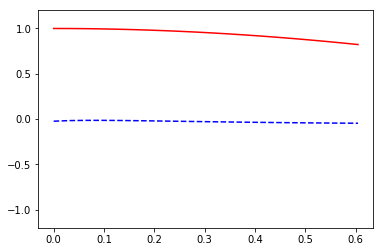

train cost:  0.50773835


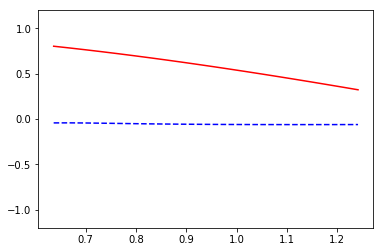

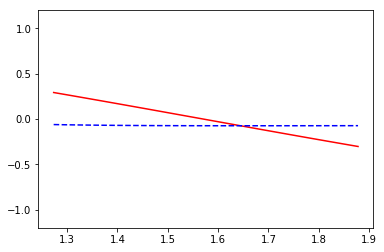

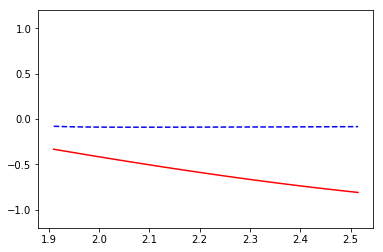

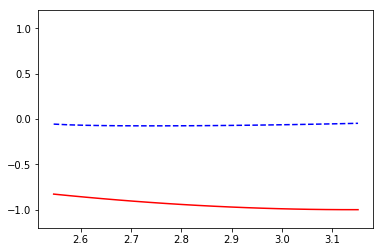

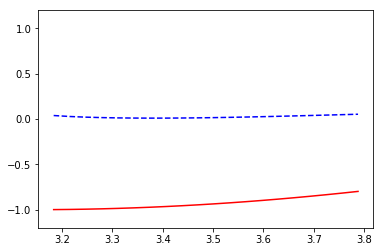

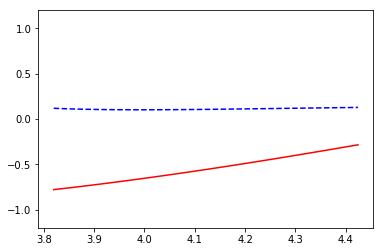

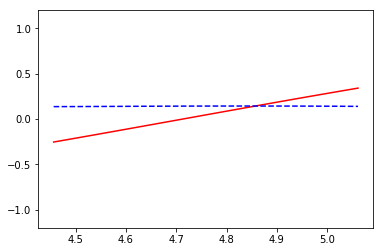

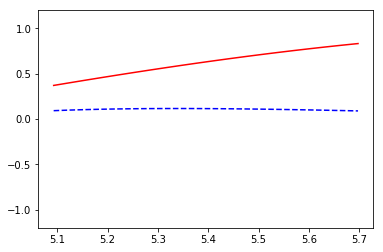

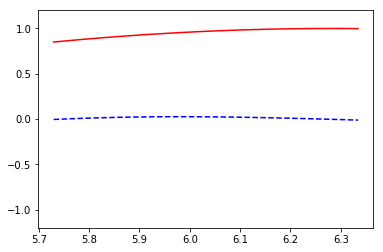

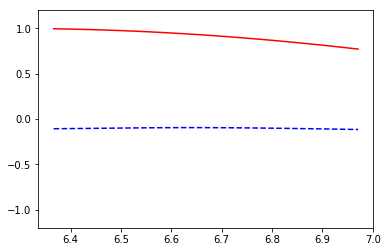

train cost:  0.4875937


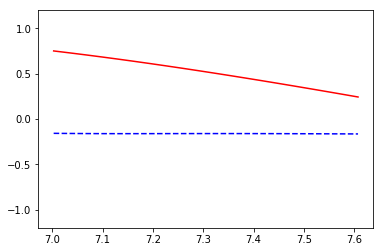

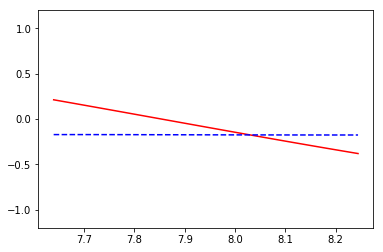

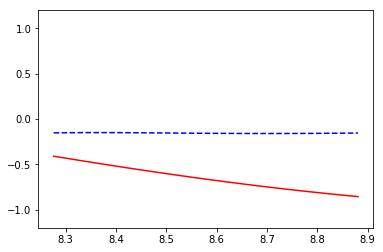

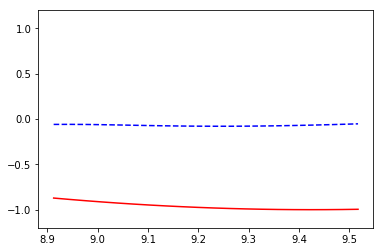

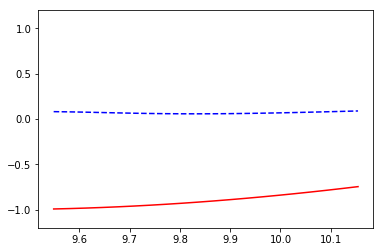

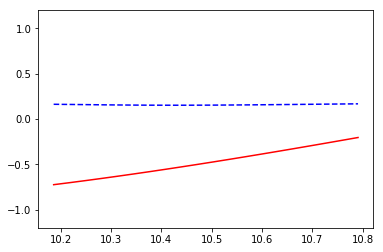

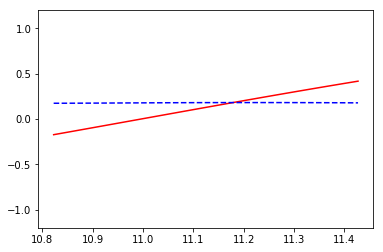

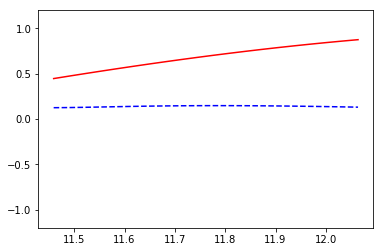

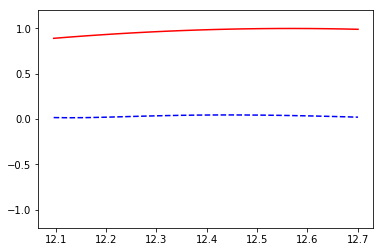

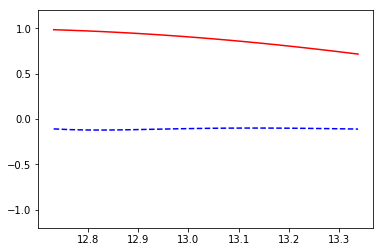

train cost:  0.46350738


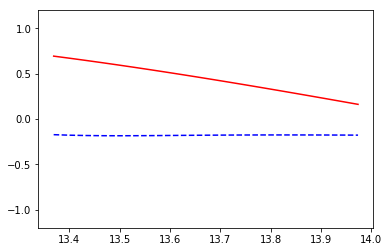

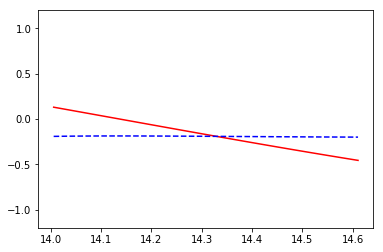

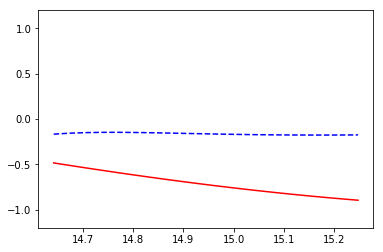

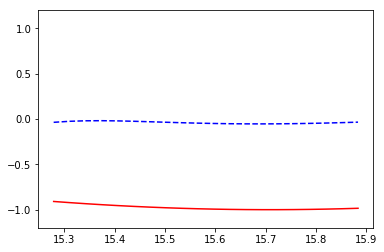

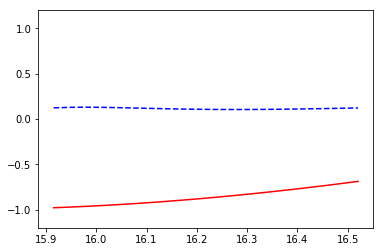

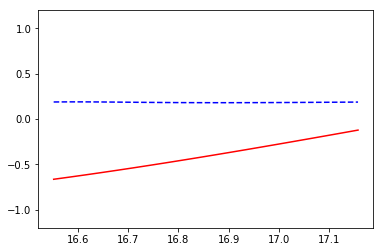

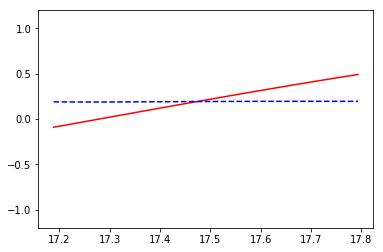

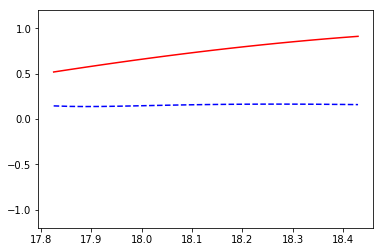

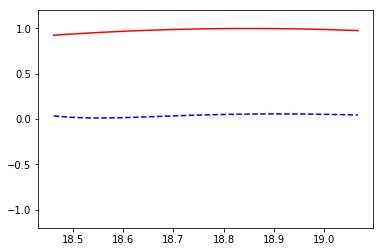

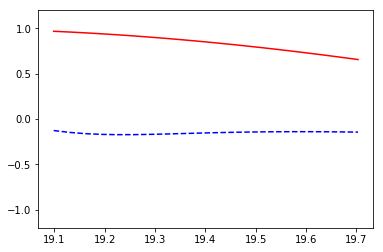

train cost:  0.4264122


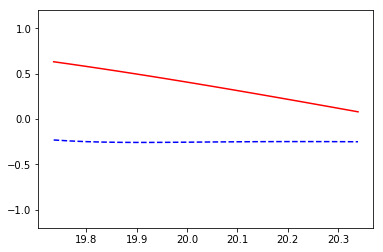

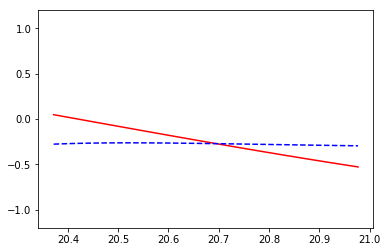

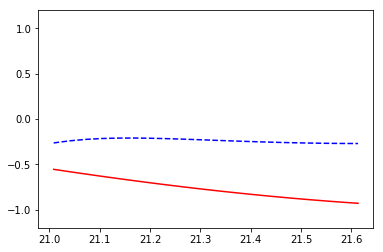

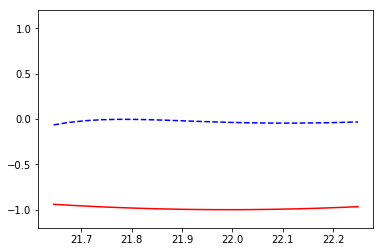

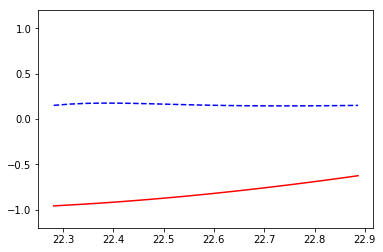

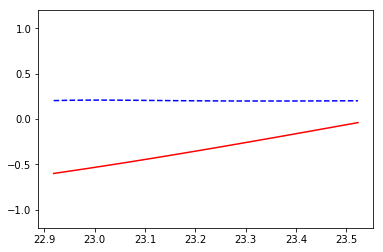

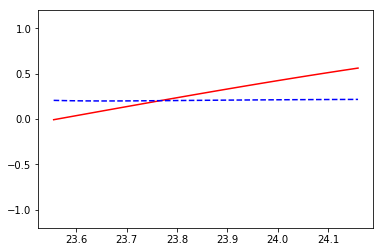

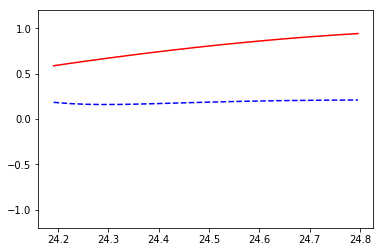

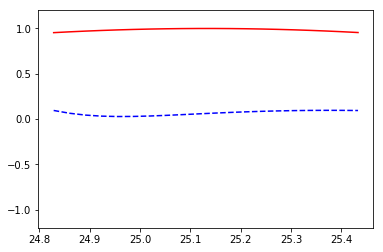

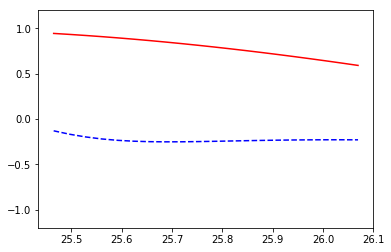

train cost:  0.35340917


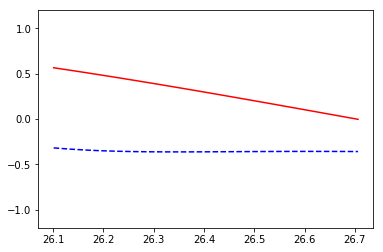

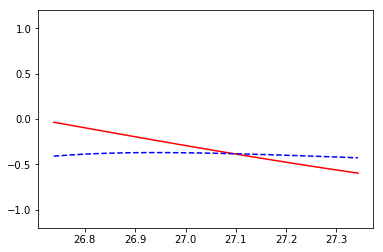

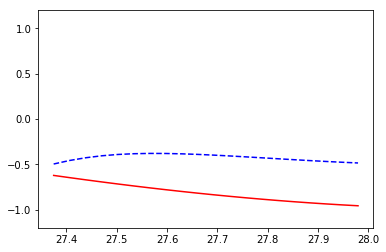

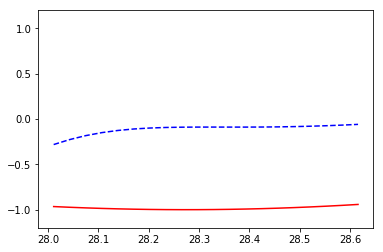

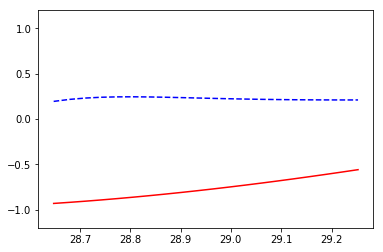

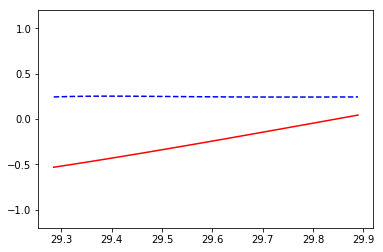

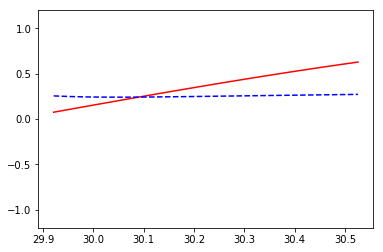

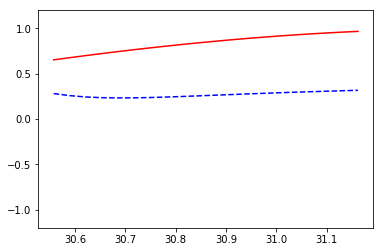

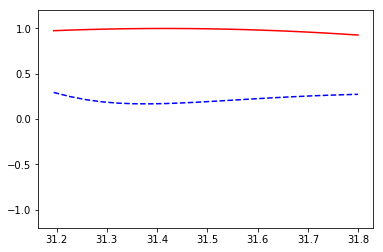

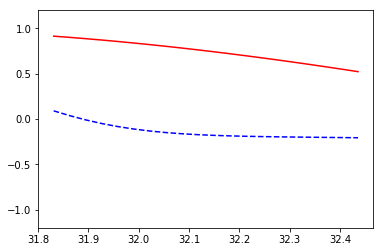

train cost:  0.2026603


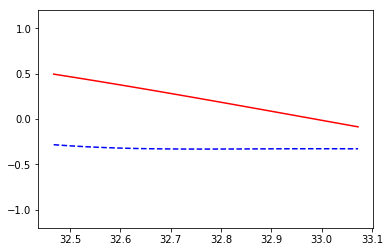

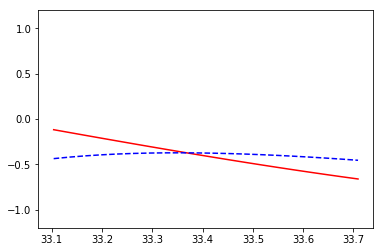

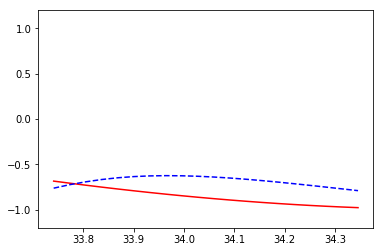

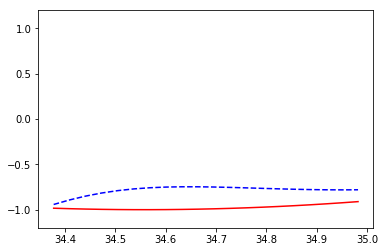

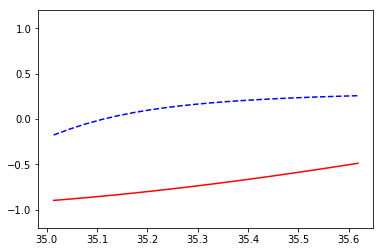

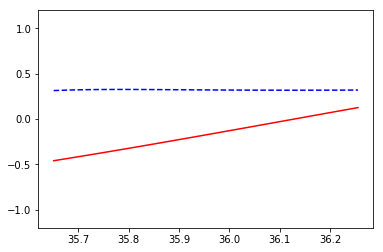

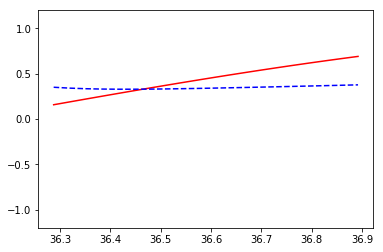

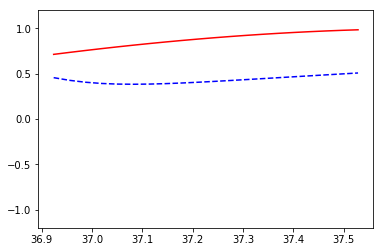

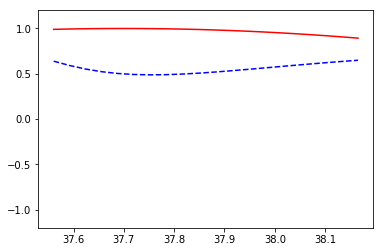

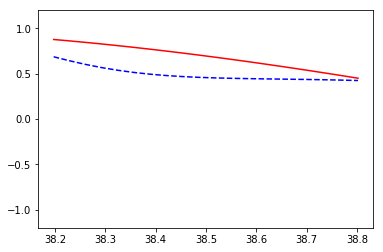

train cost:  0.059876654


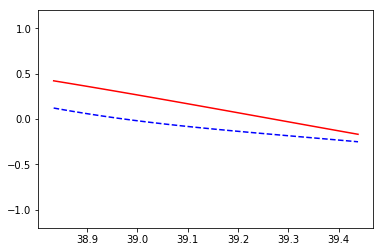

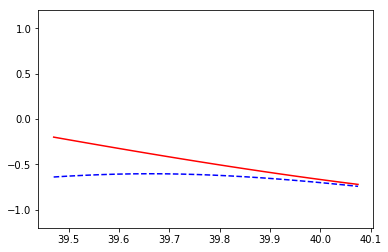

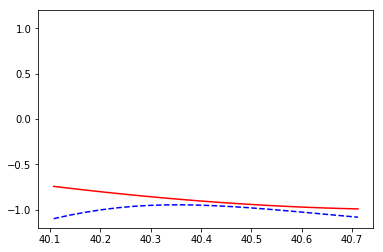

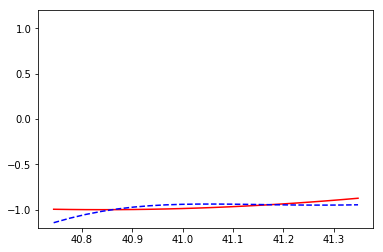

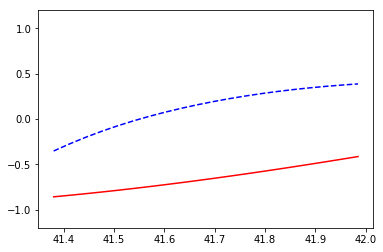

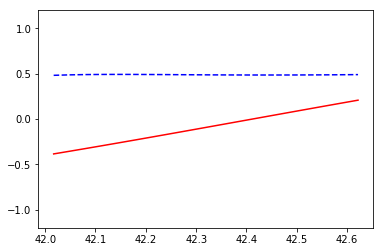

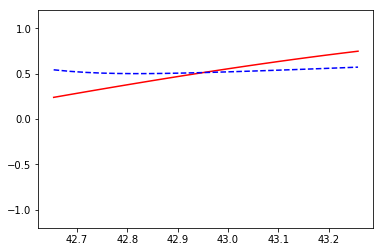

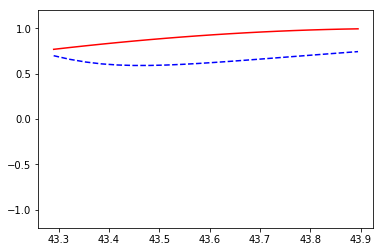

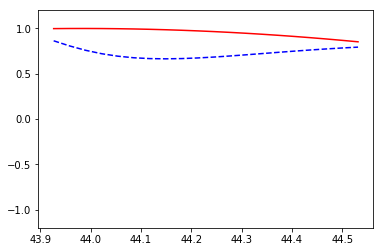

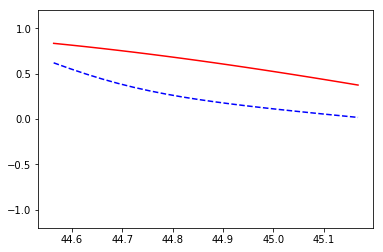

train cost:  0.07322481


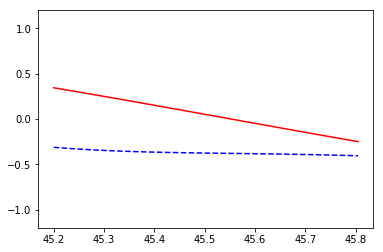

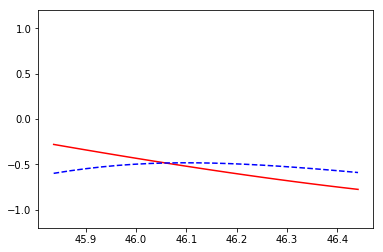

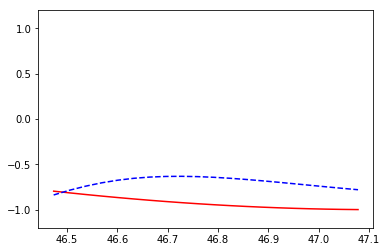

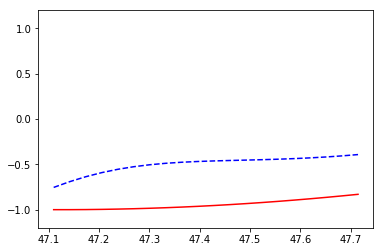

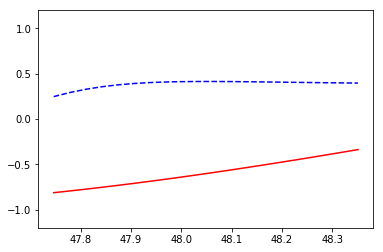

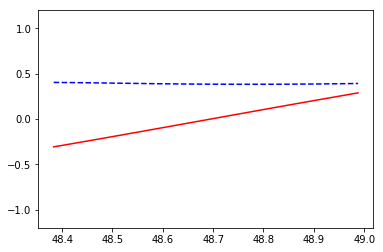

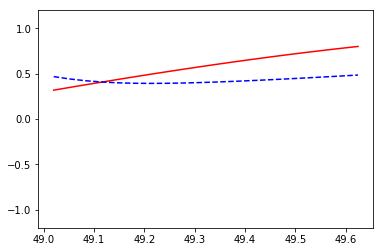

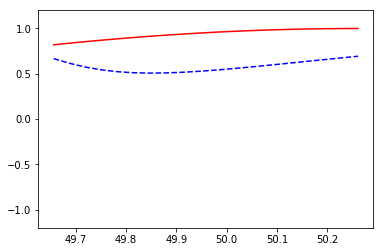

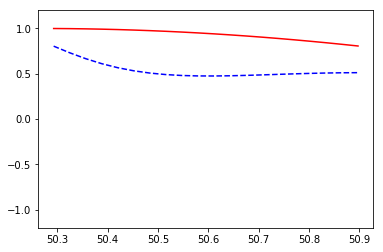

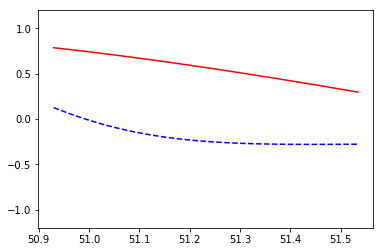

train cost:  0.06986473


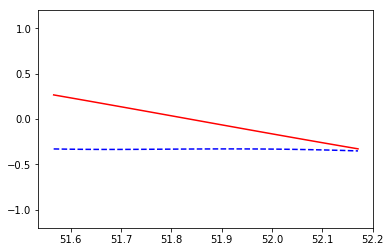

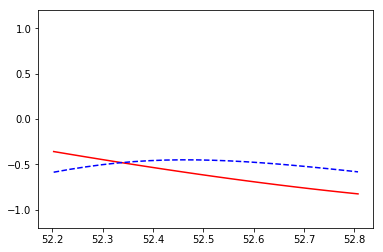

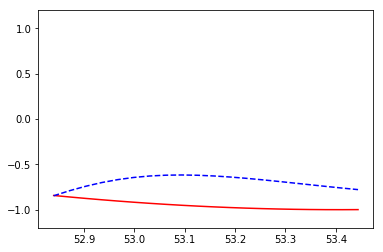

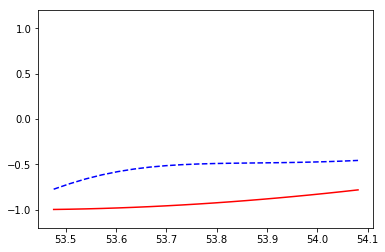

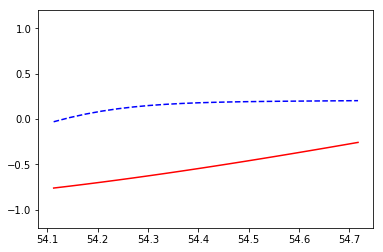

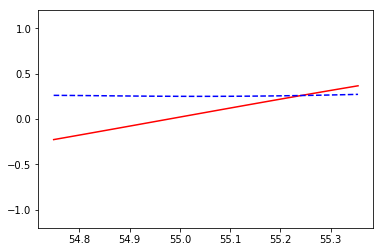

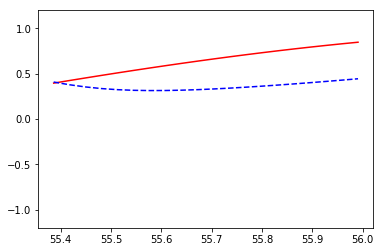

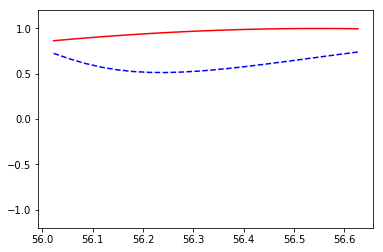

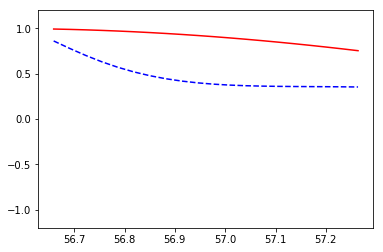

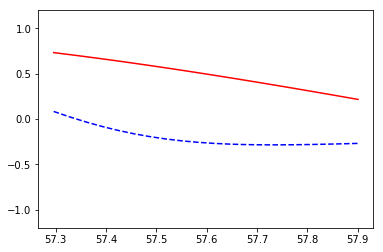

train cost:  0.042208146


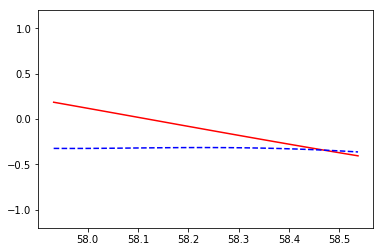

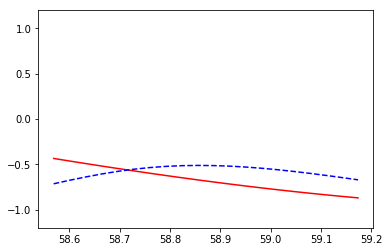

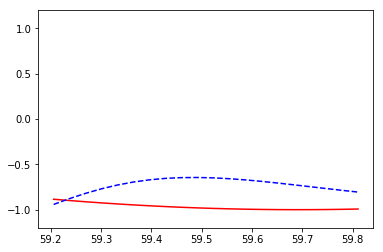

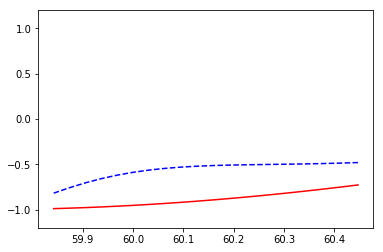

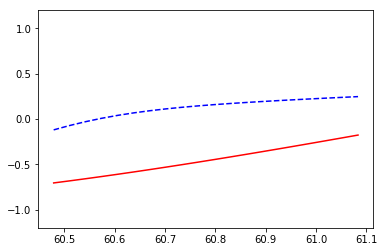

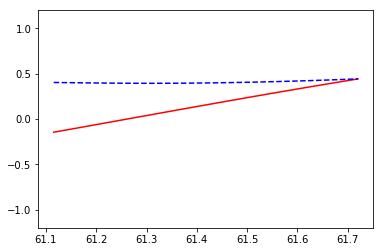

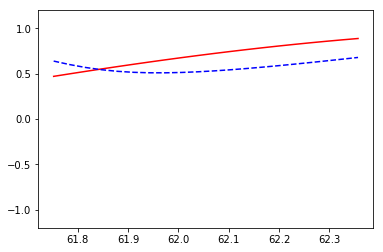

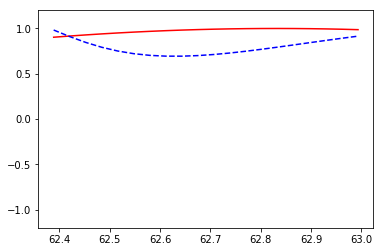

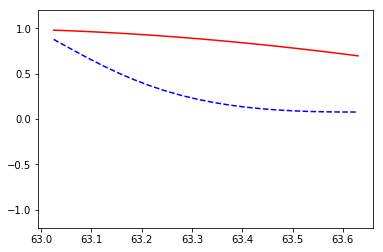

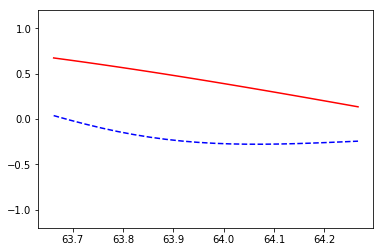

train cost:  0.032592285


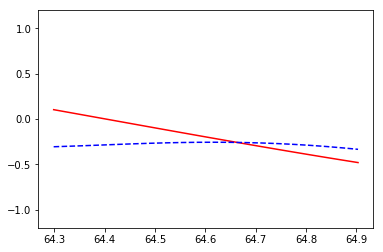

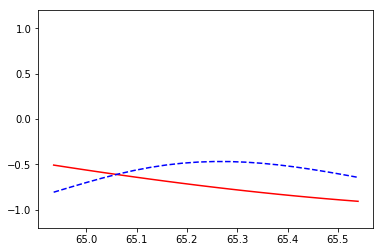

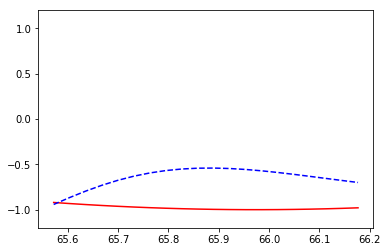

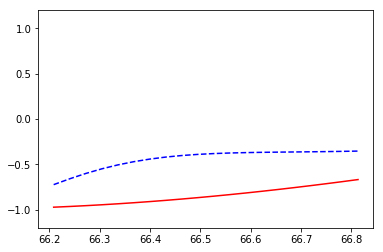

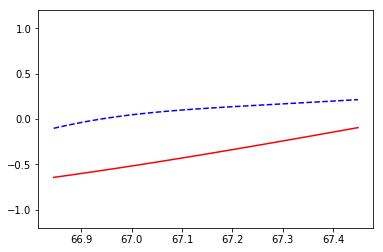

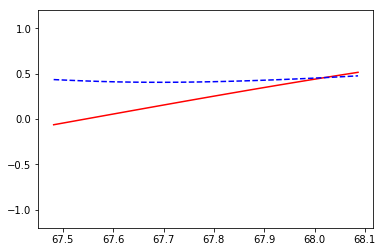

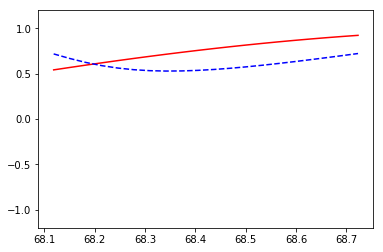

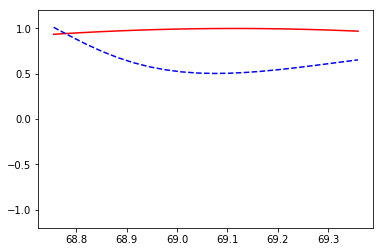

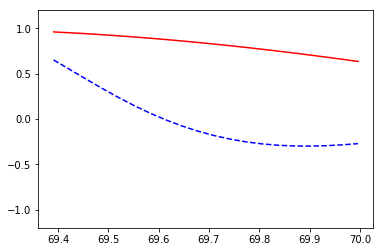

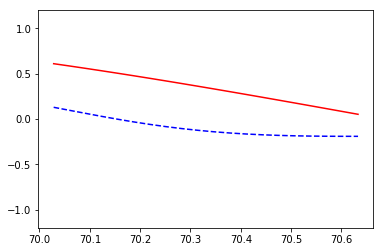

train cost:  0.044084255


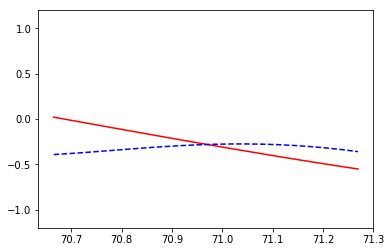

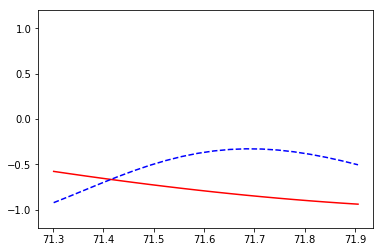

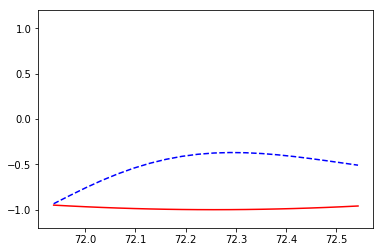

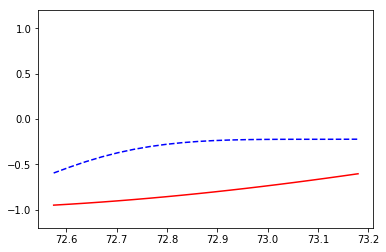

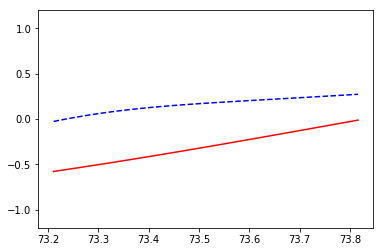

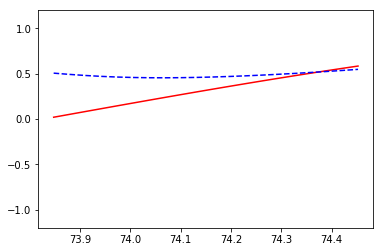

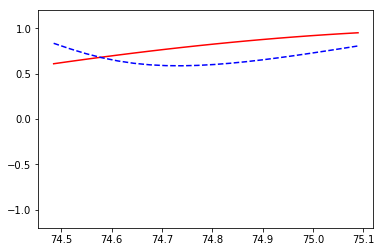

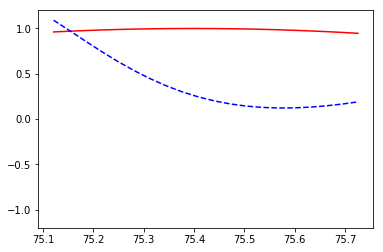

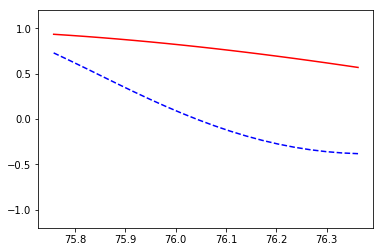

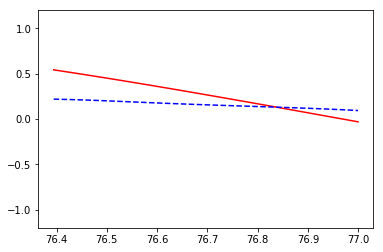

train cost:  0.07317427


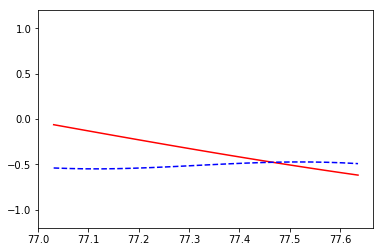

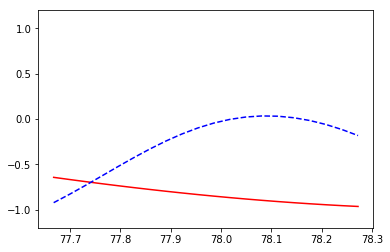

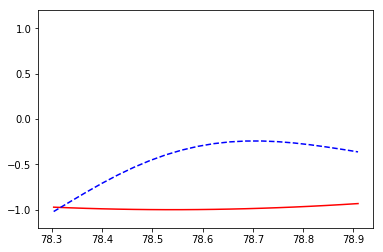

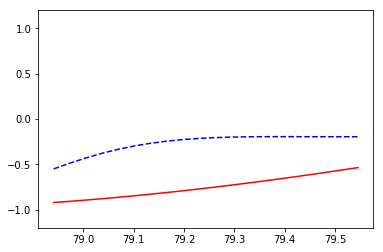

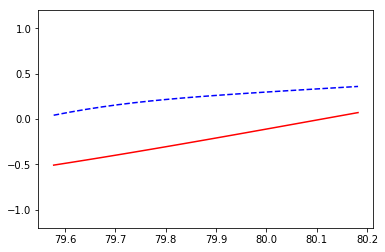

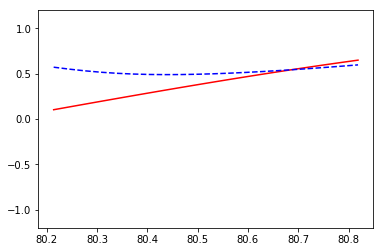

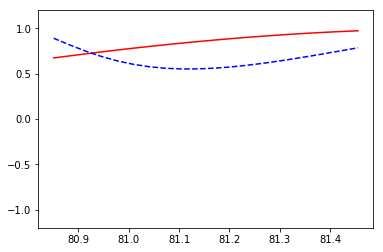

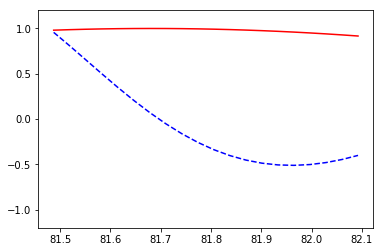

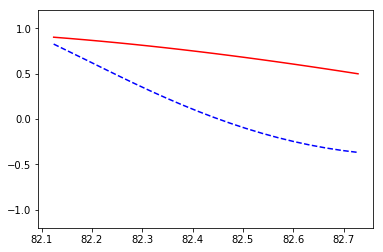

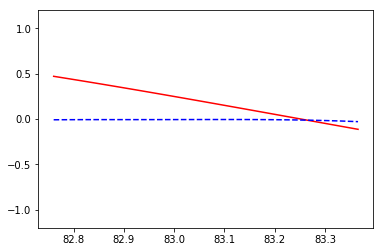

train cost:  0.09720699


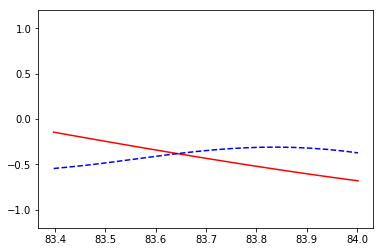

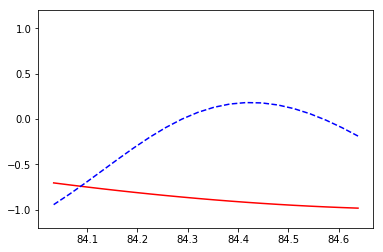

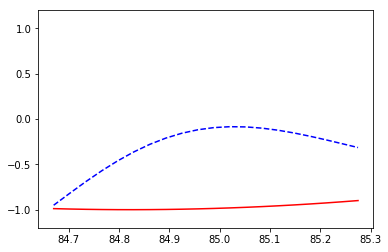

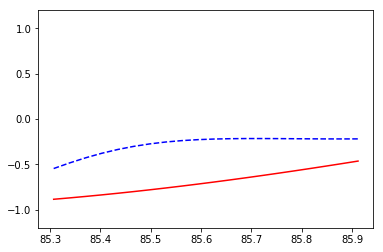

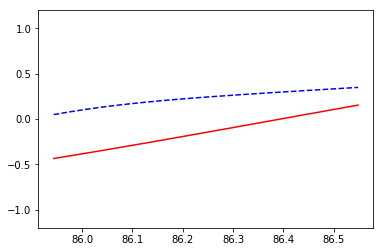

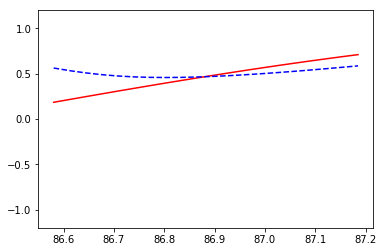

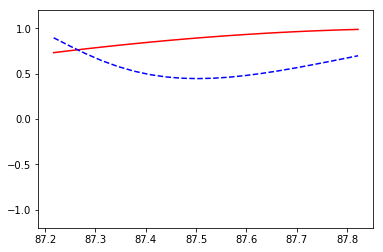

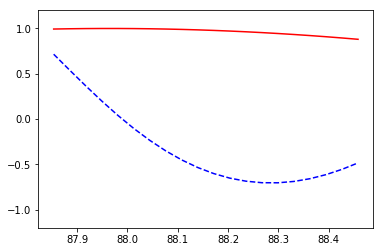

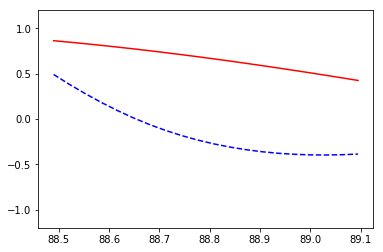

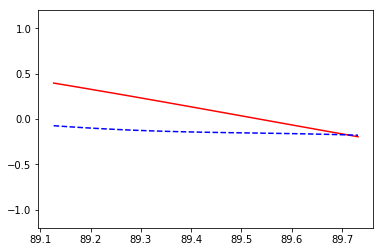

train cost:  0.07678697


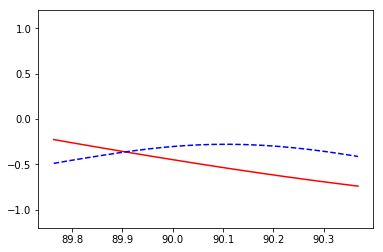

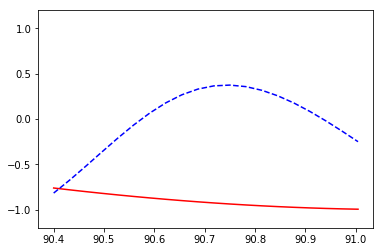

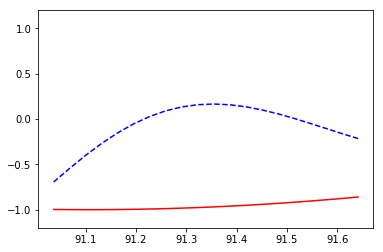

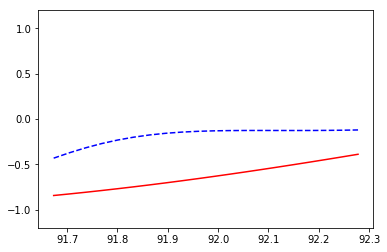

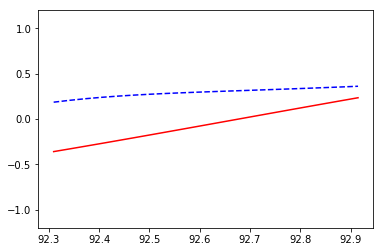

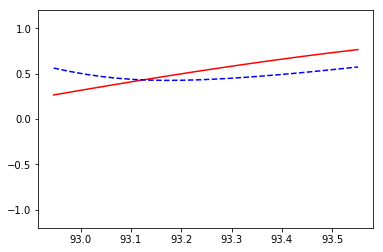

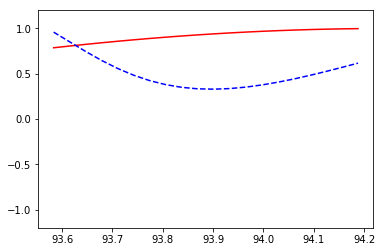

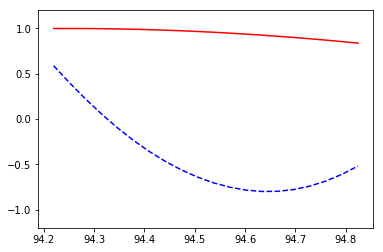

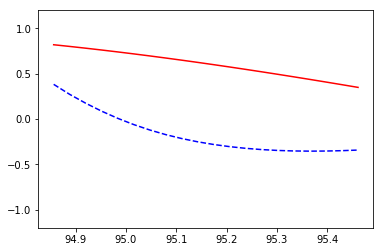

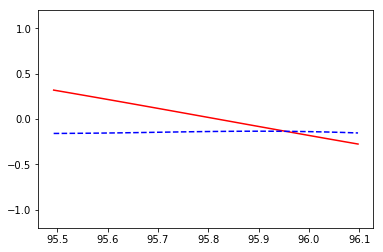

train cost:  0.07278444


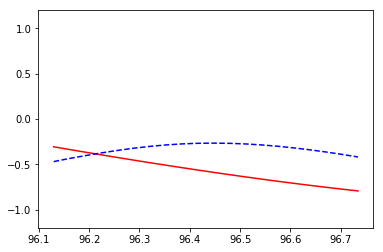

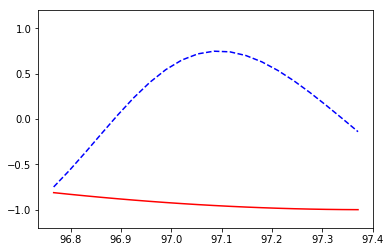

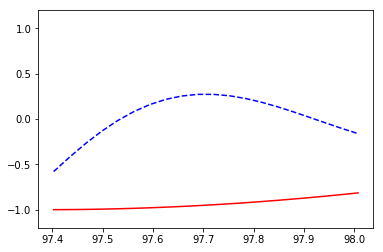

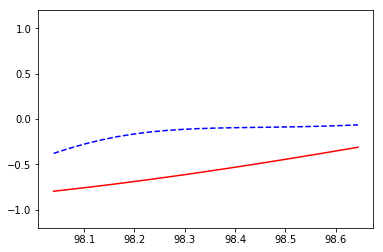

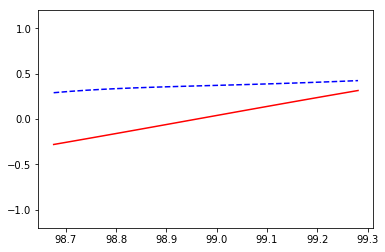

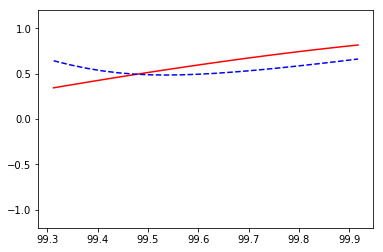

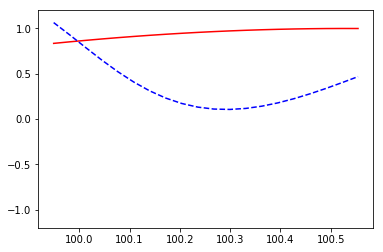

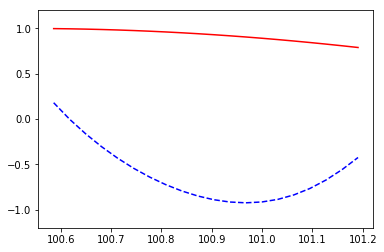

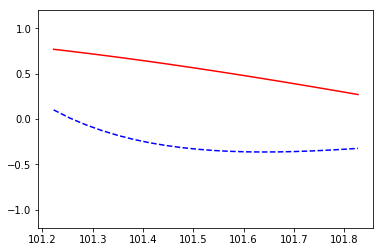

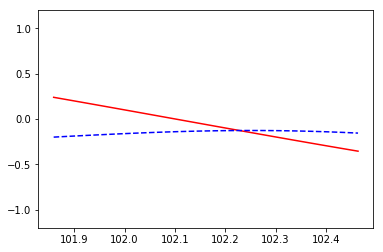

train cost:  0.06477359


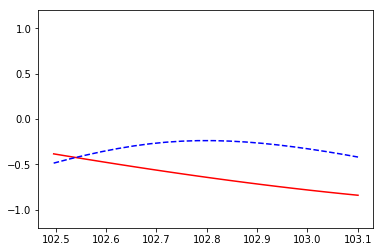

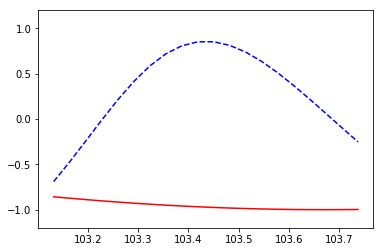

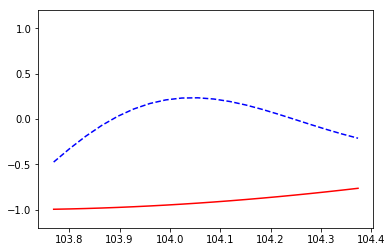

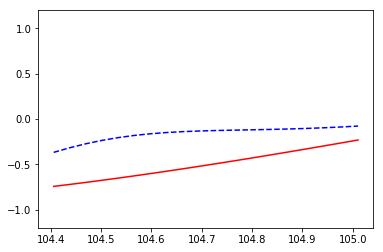

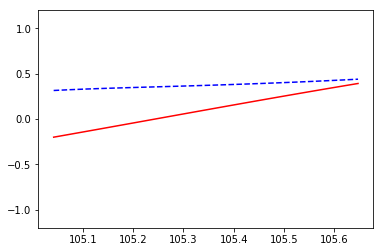

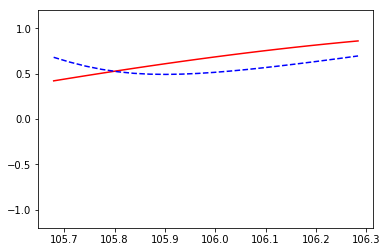

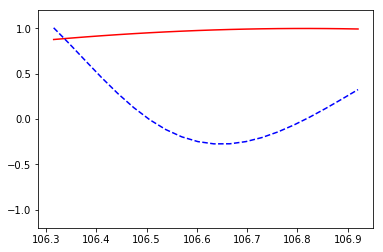

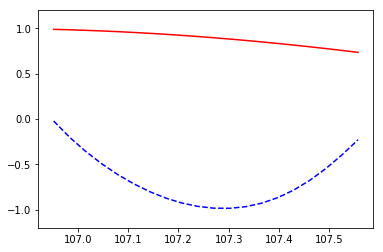

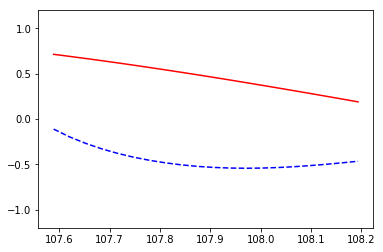

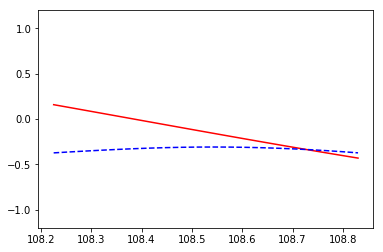

train cost:  0.047609415


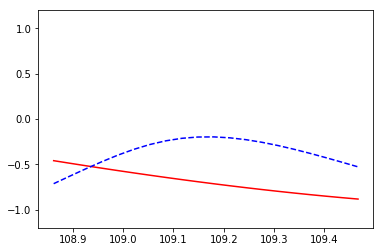

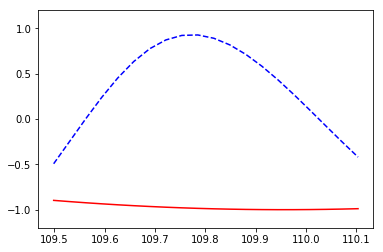

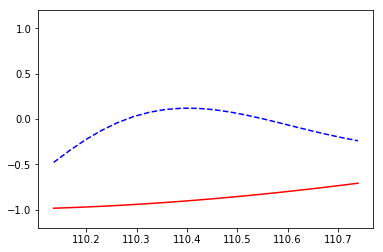

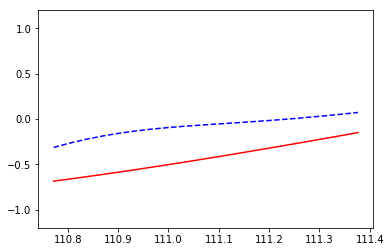

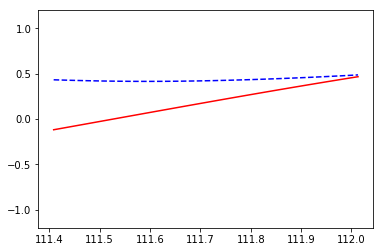

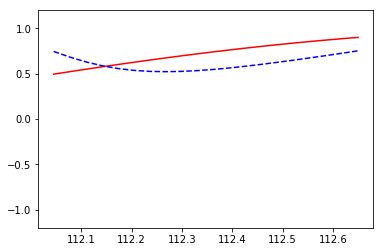

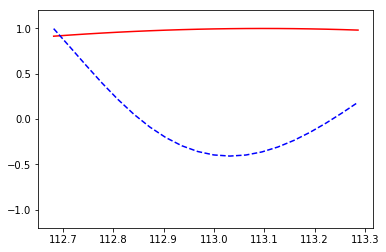

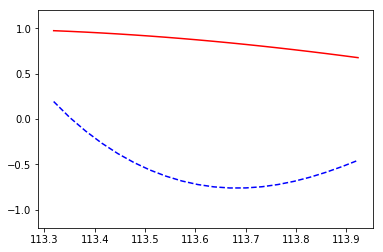

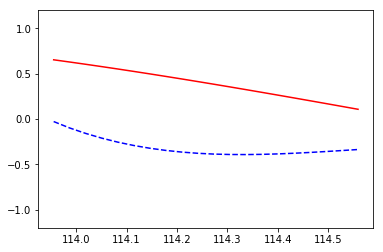

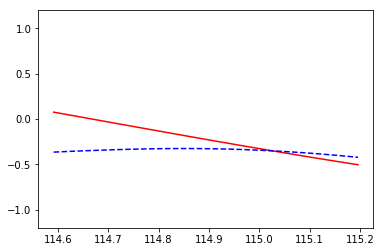

train cost:  0.04573597


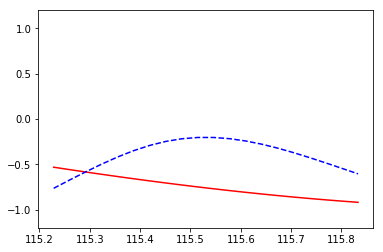

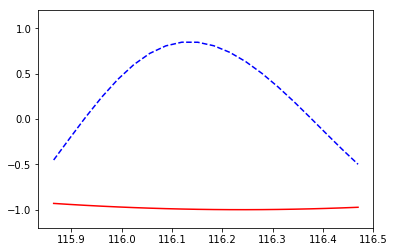

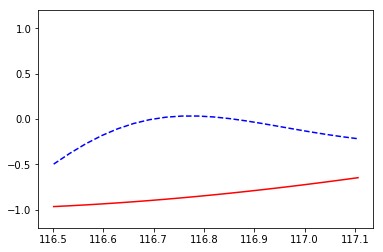

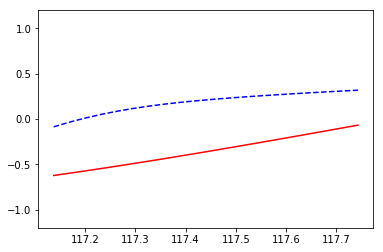

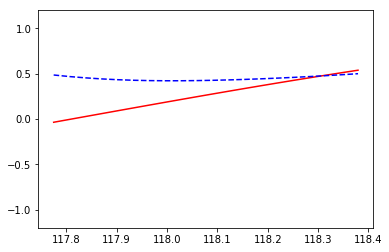

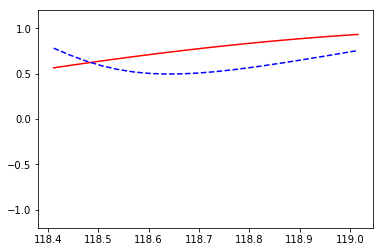

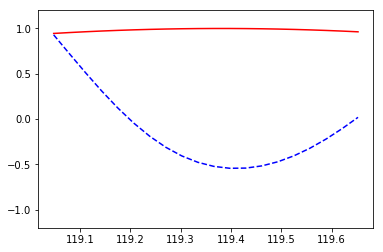

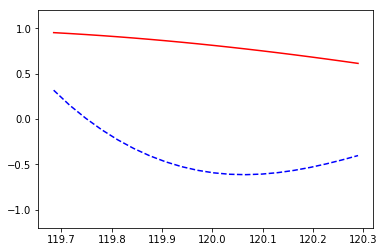

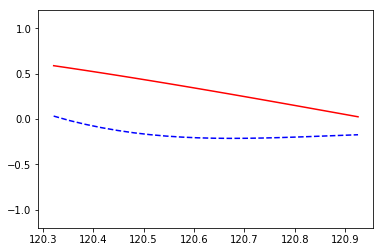

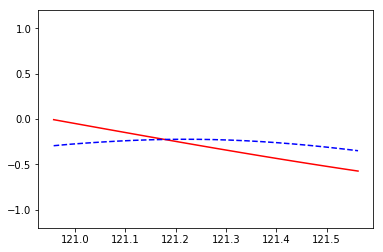

train cost:  0.044818725


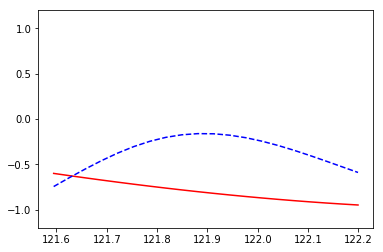

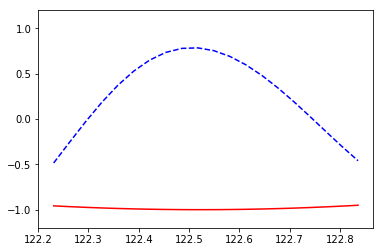

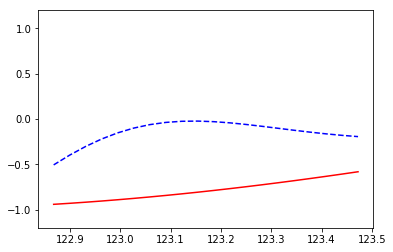

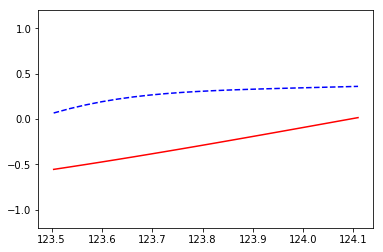

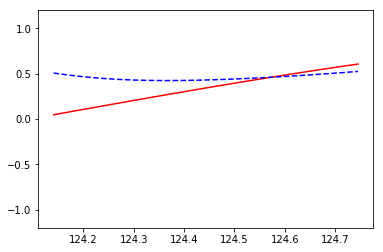

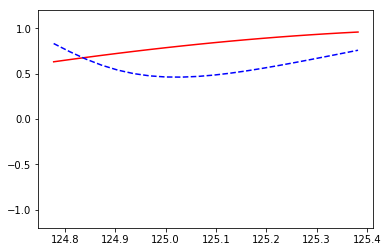

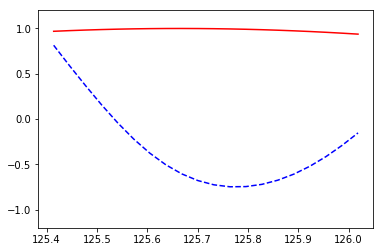

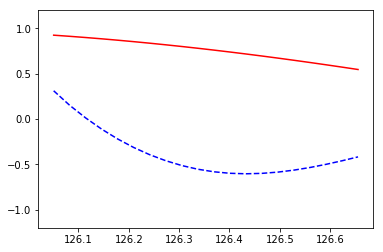

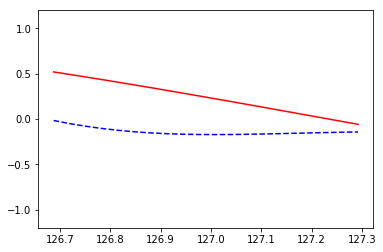

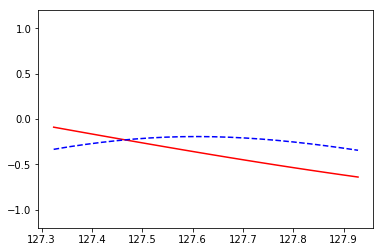

train cost:  0.04432515


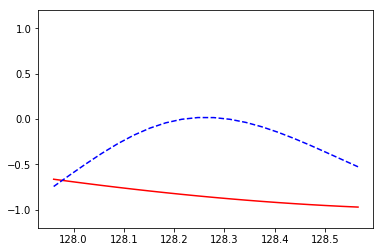

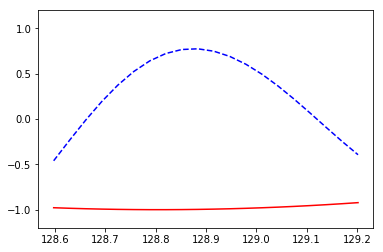

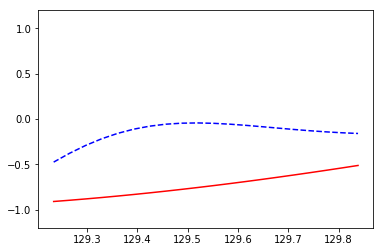

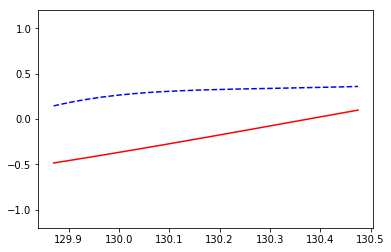

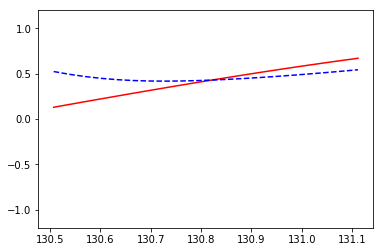

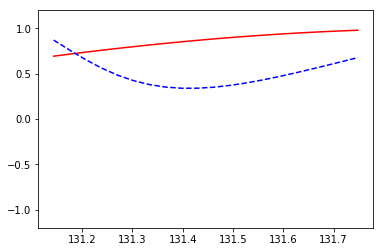

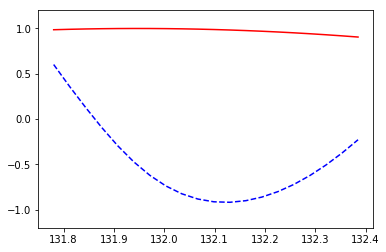

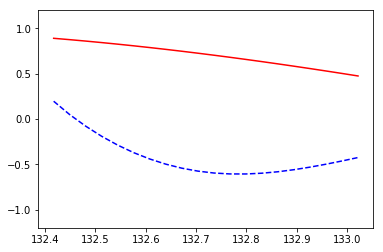

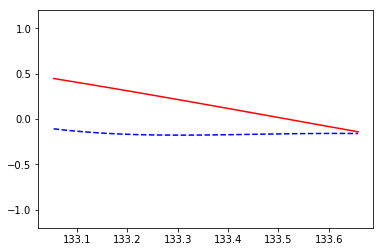

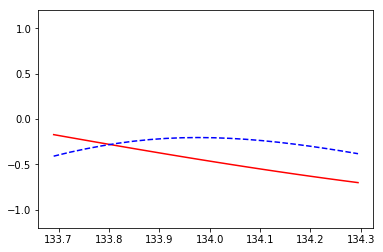

train cost:  0.043354314


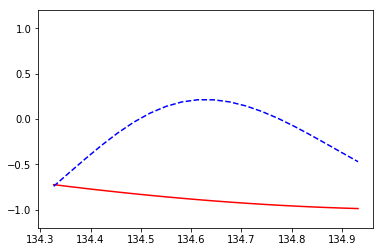

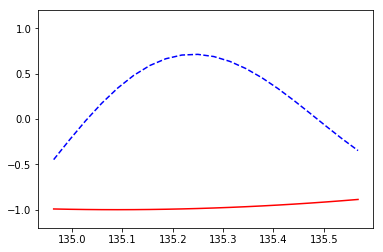

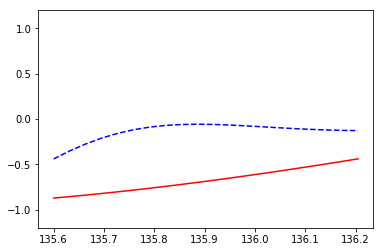

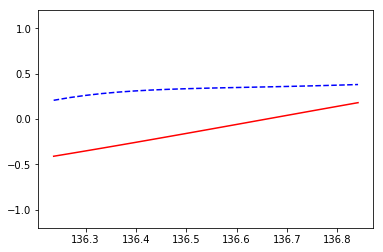

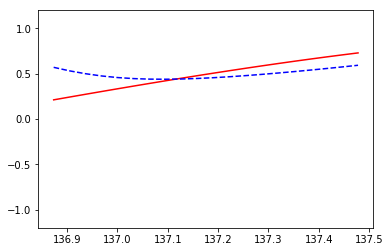

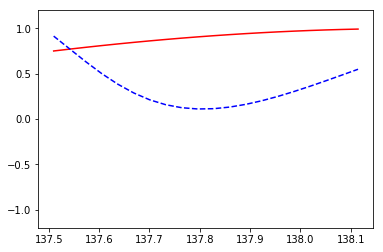

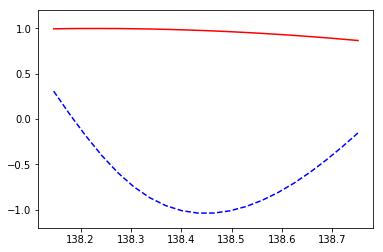

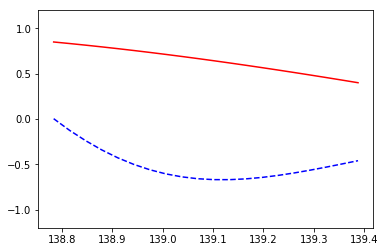

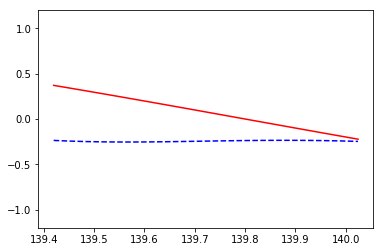

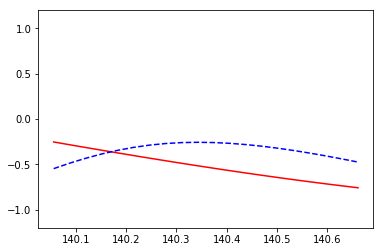

train cost:  0.043072928


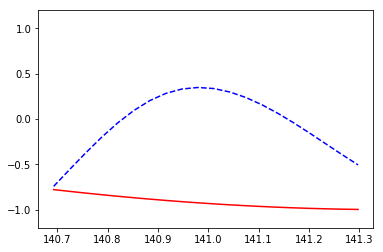

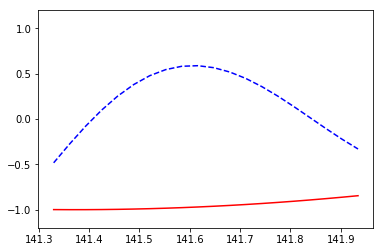

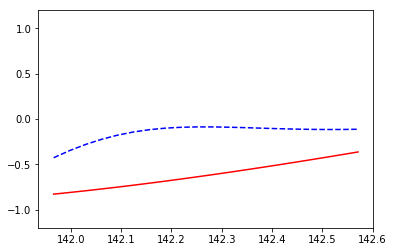

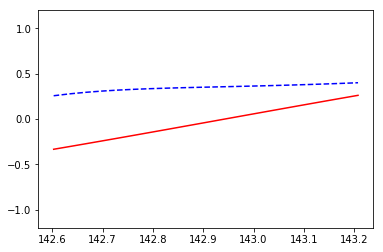

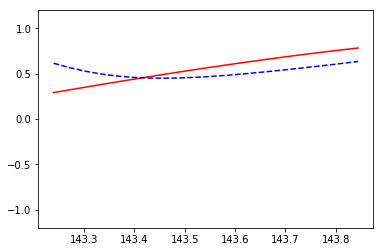

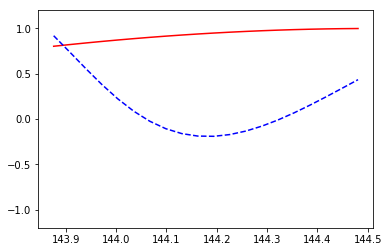

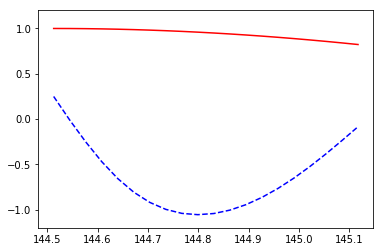

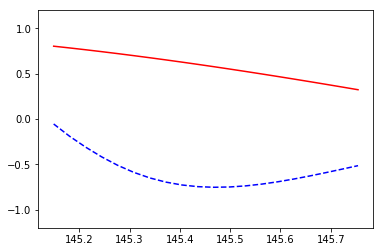

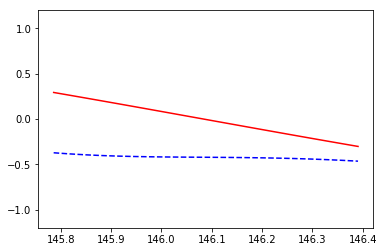

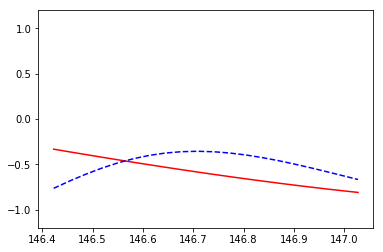

train cost:  0.04271186


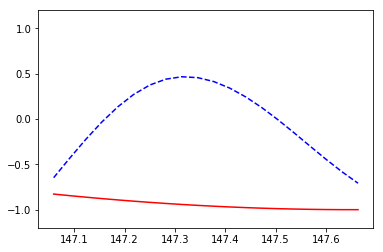

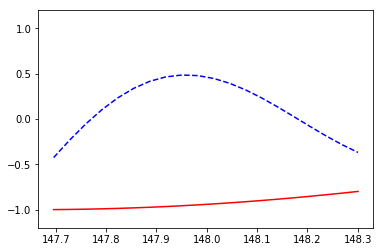

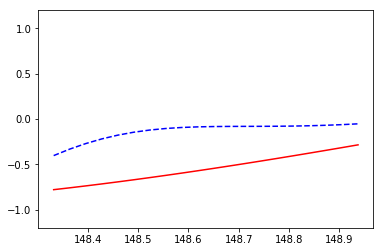

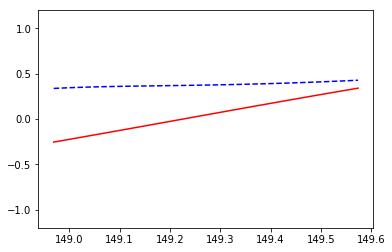

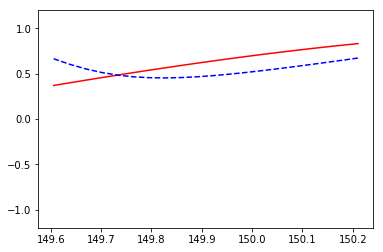

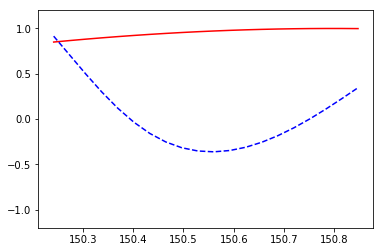

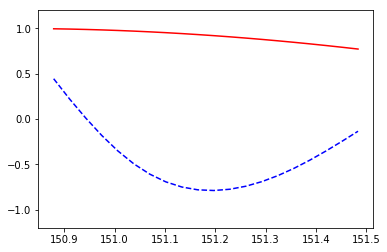

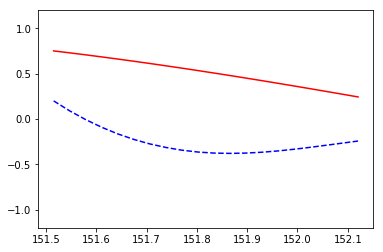

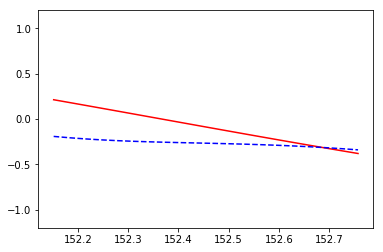

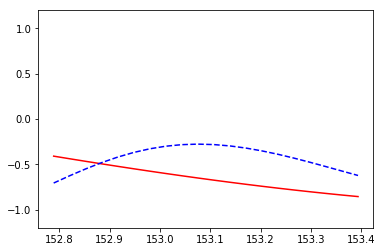

train cost:  0.030287113


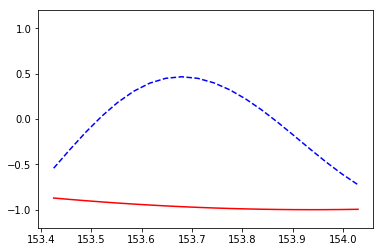

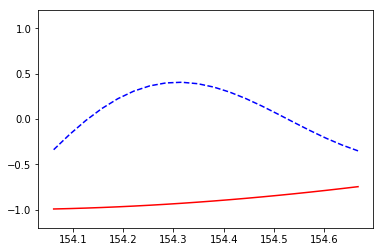

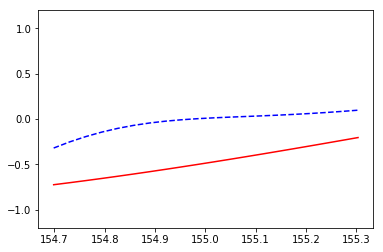

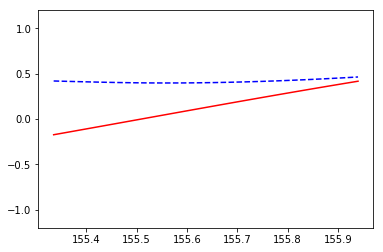

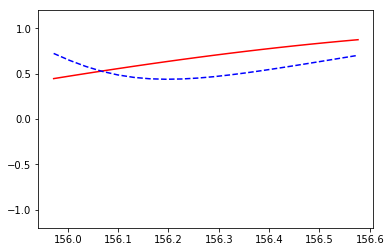

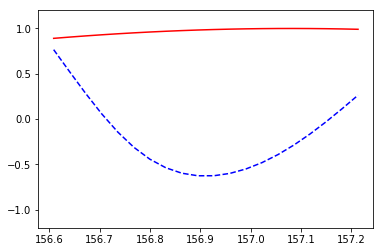

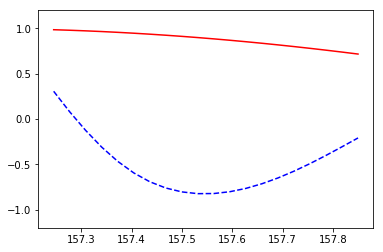

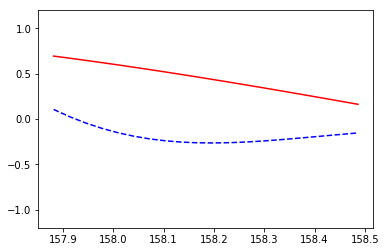

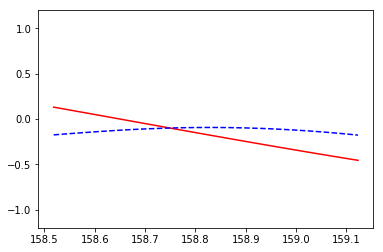

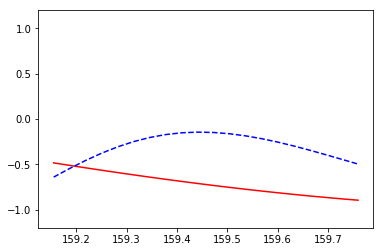

train cost:  0.03537605


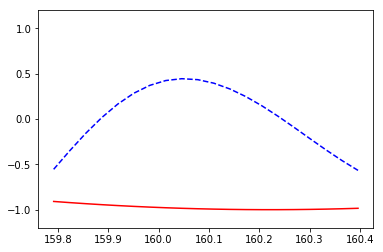

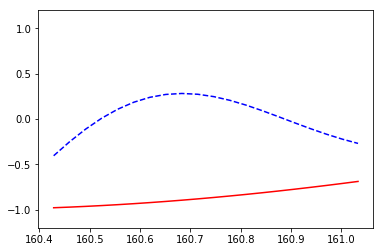

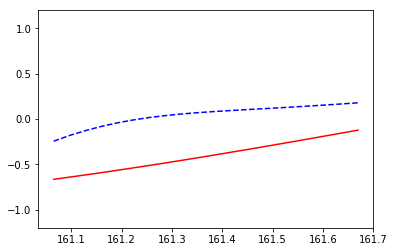

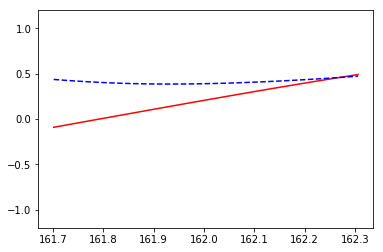

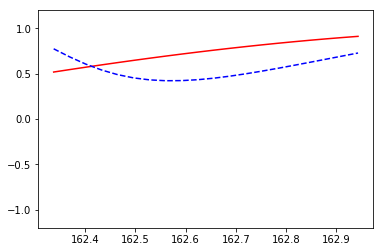

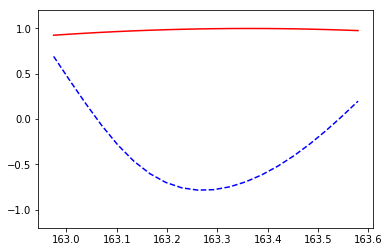

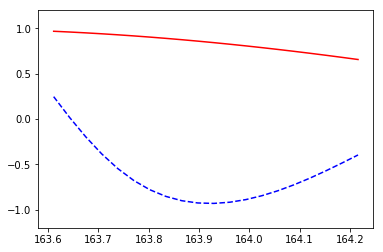

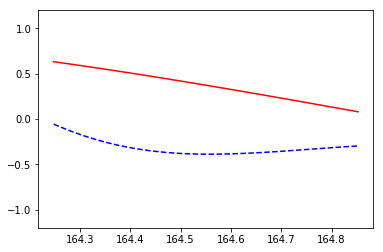

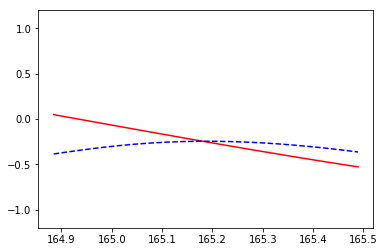

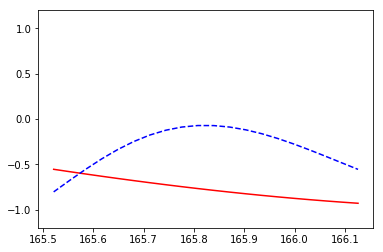

train cost:  0.027677363


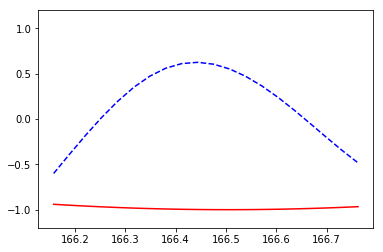

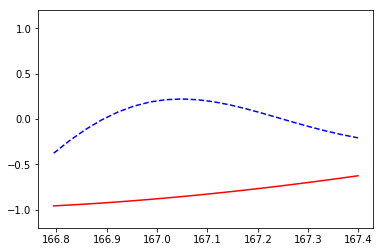

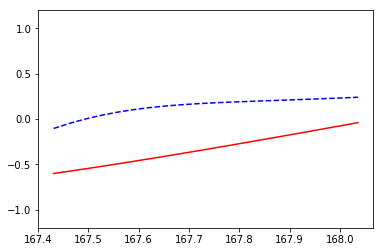

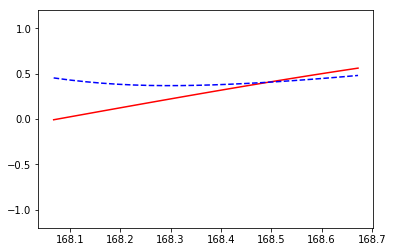

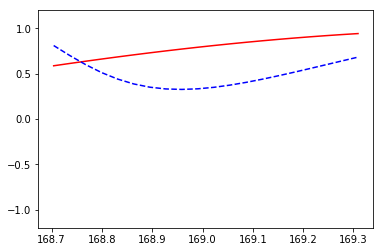

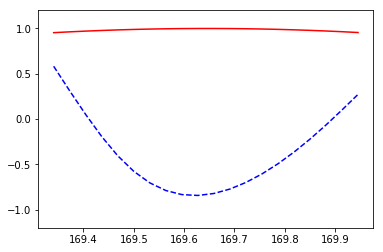

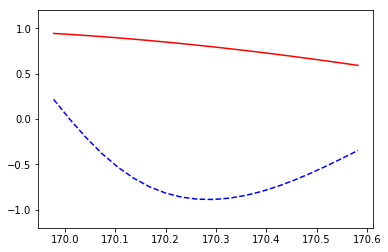

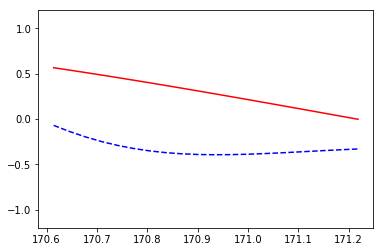

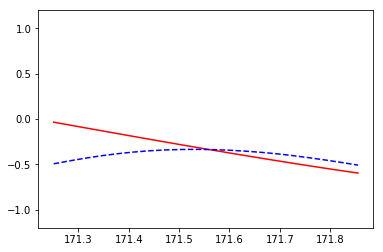

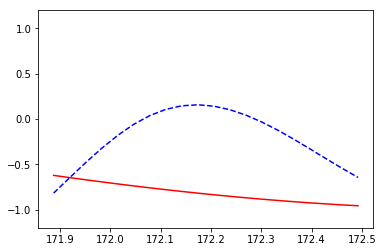

train cost:  0.025236396


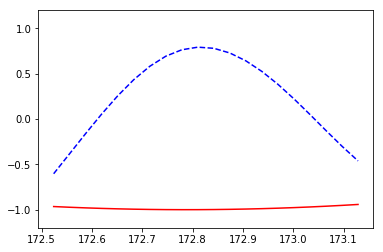

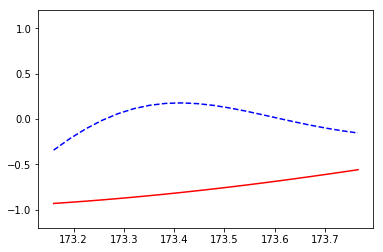

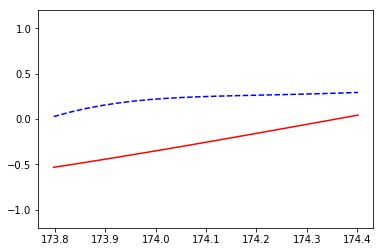

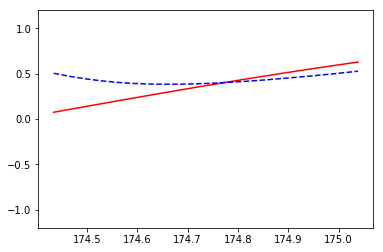

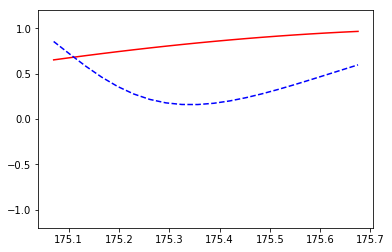

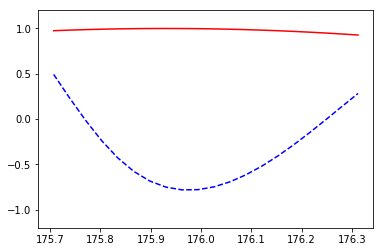

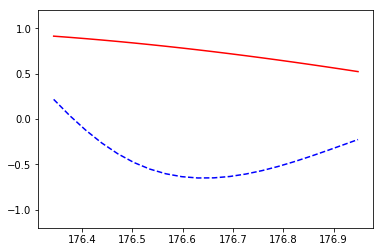

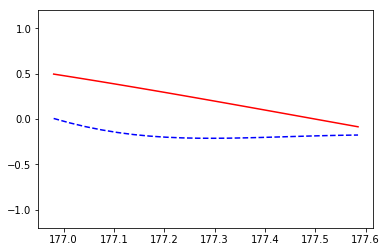

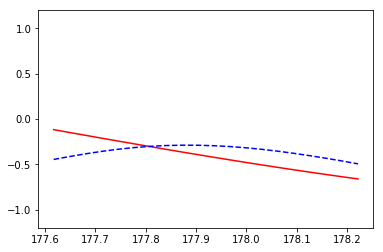

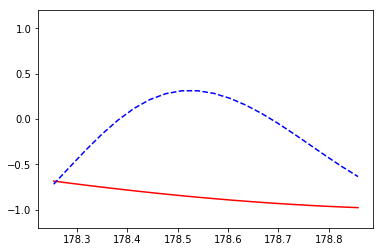

train cost:  0.020985505


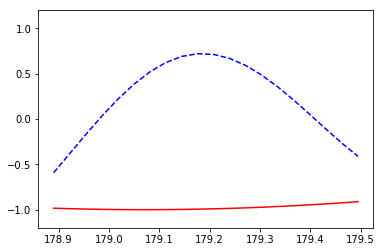

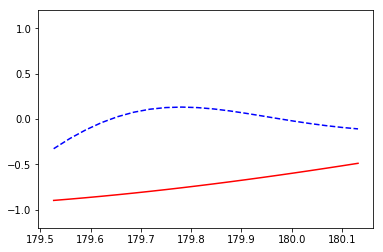

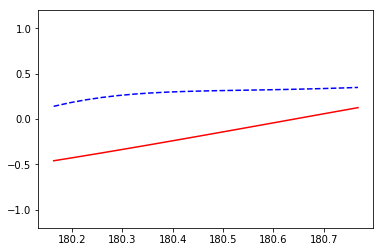

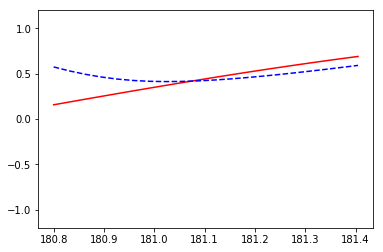

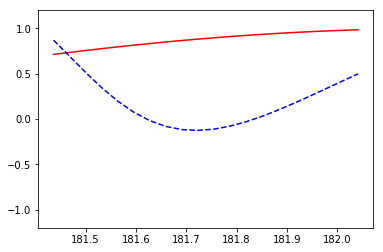

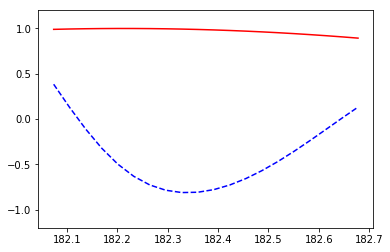

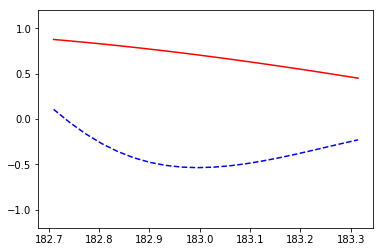

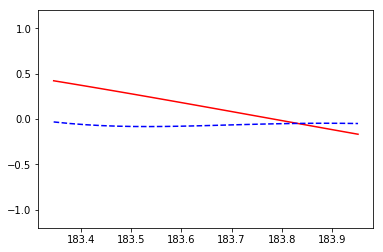

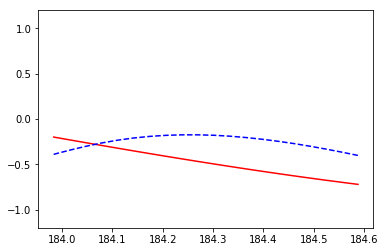

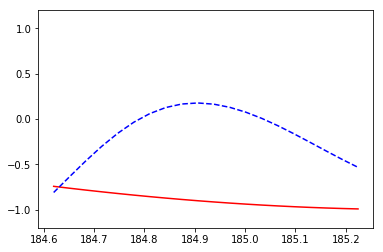

train cost:  0.031741492


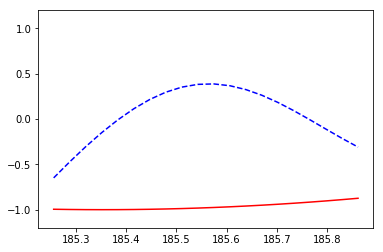

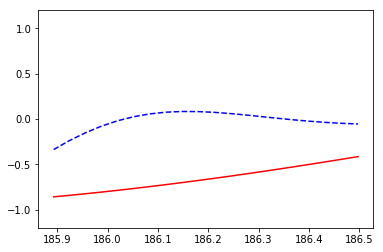

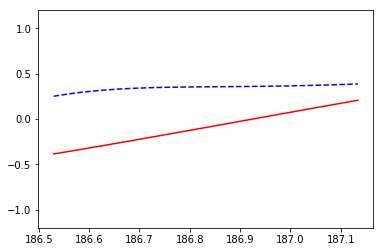

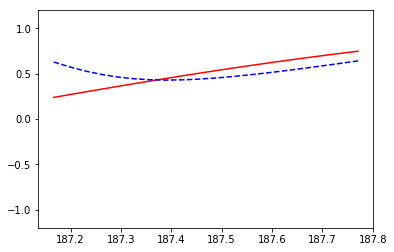

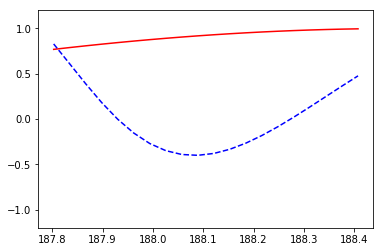

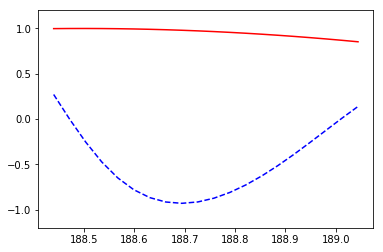

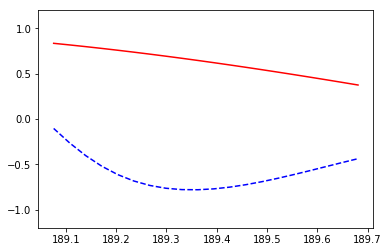

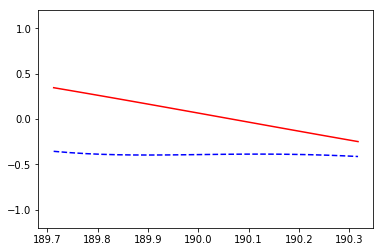

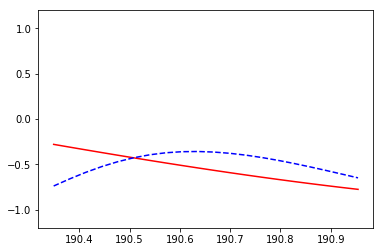

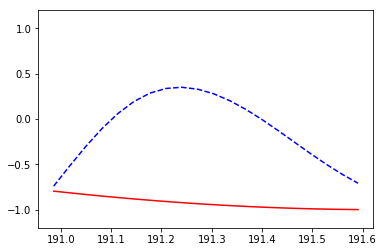

train cost:  0.0248242


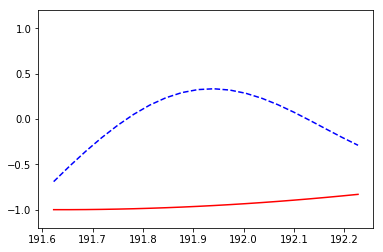

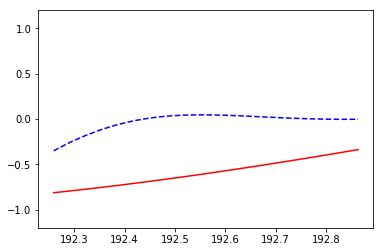

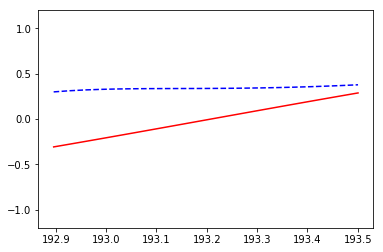

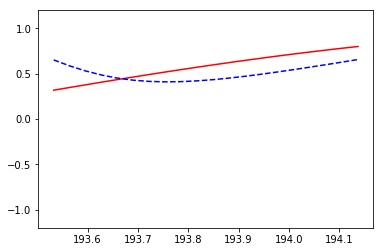

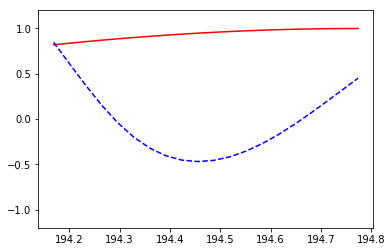

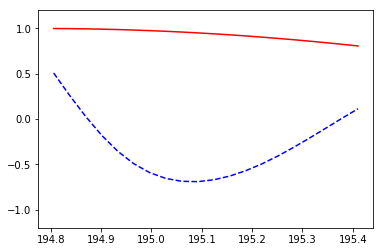

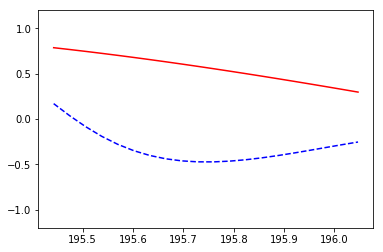

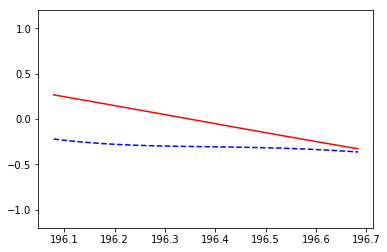

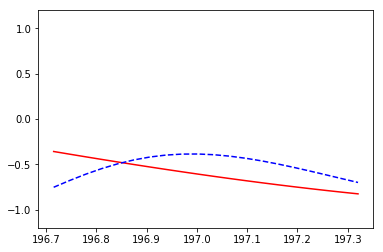

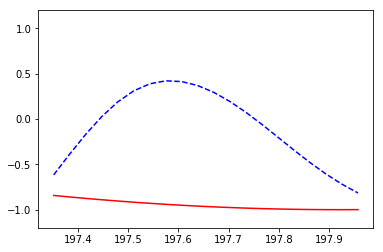

train cost:  0.0233626


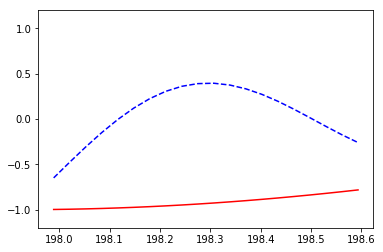

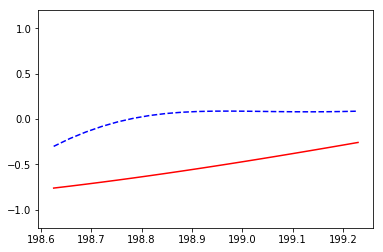

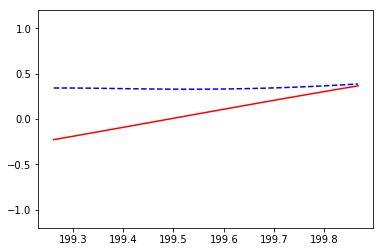

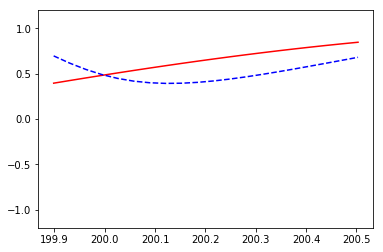

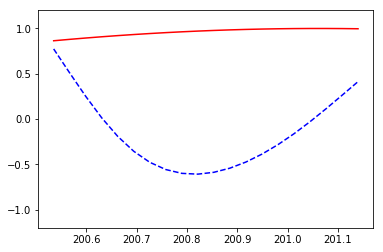

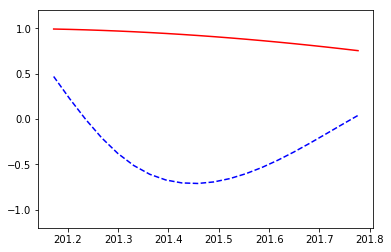

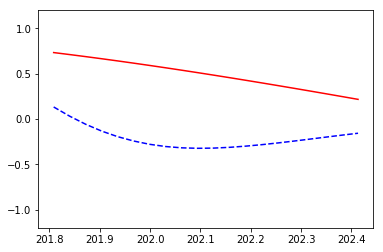

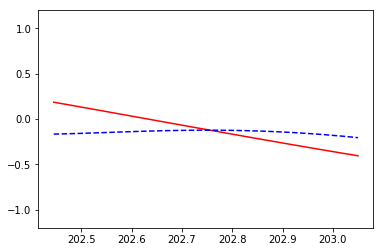

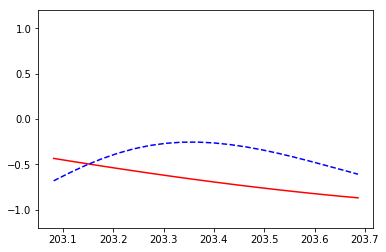

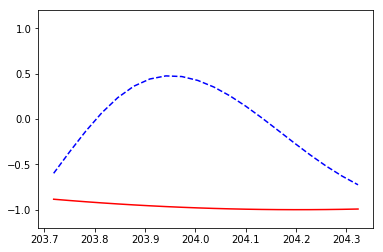

train cost:  0.021338882


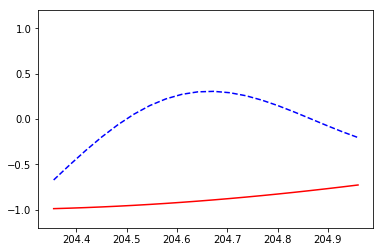

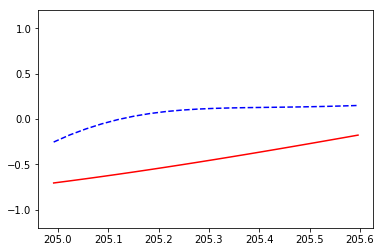

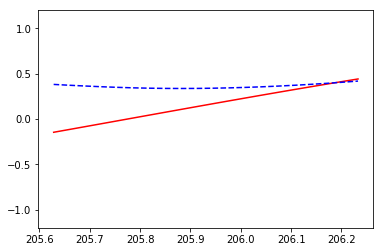

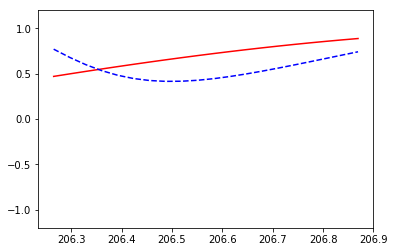

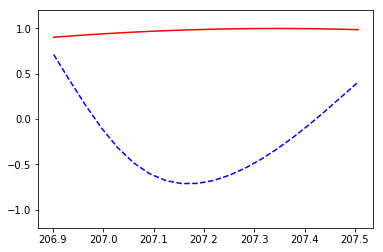

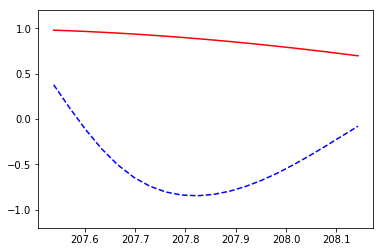

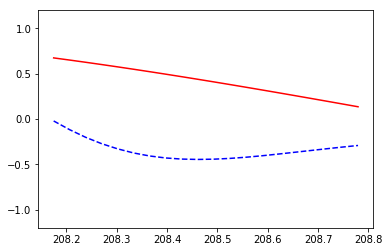

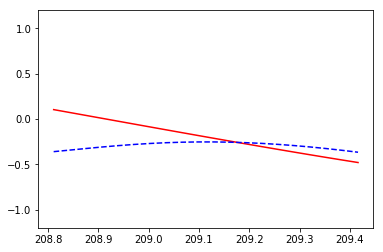

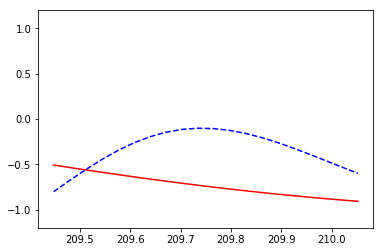

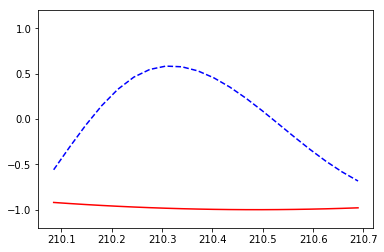

train cost:  0.01655774


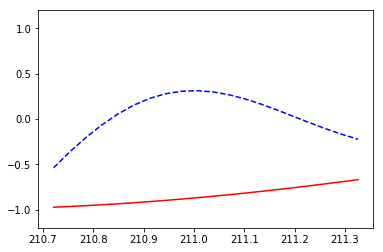

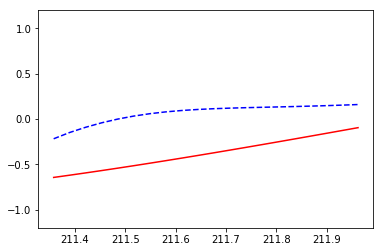

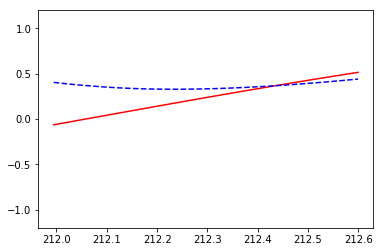

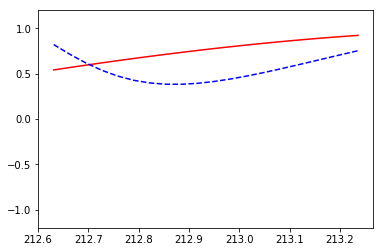

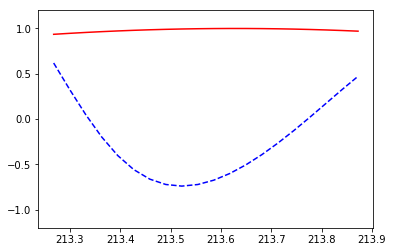

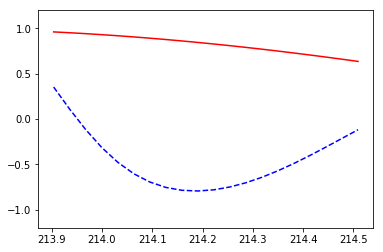

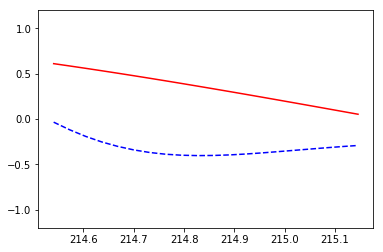

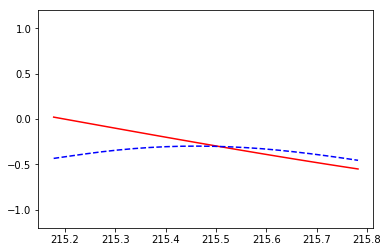

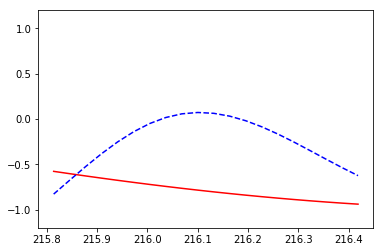

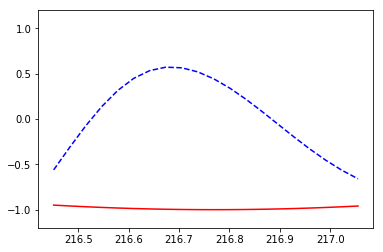

train cost:  0.015683258


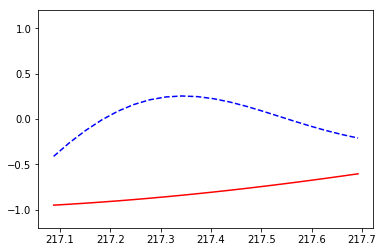

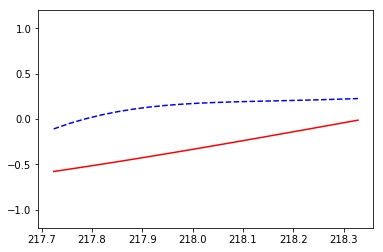

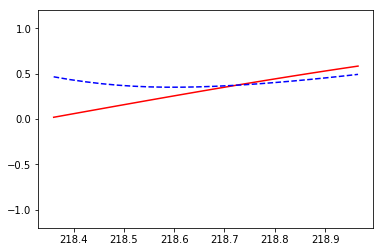

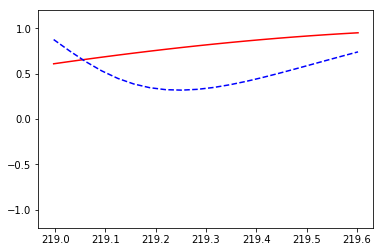

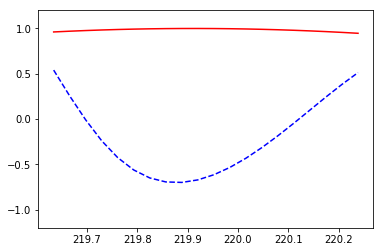

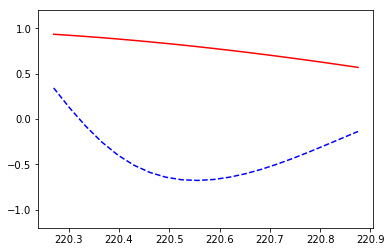

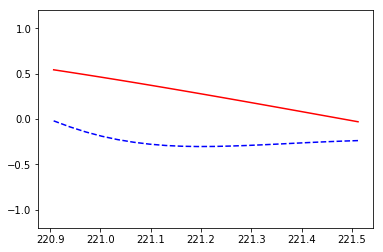

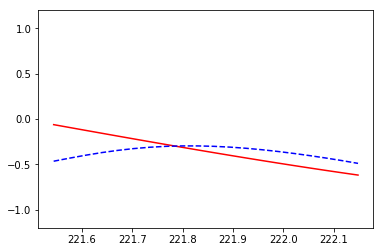

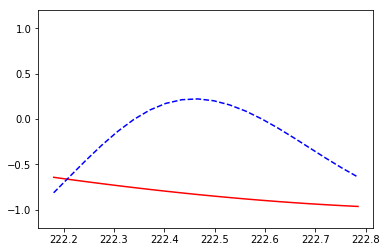

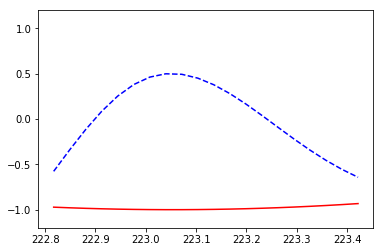

train cost:  0.014982554


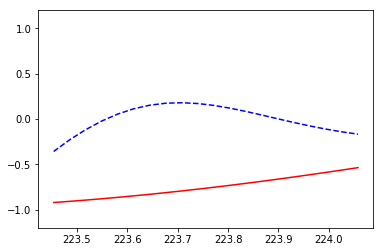

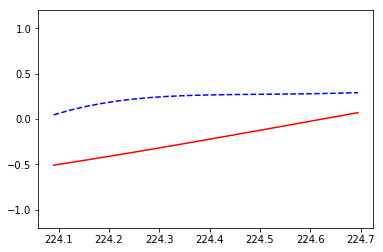

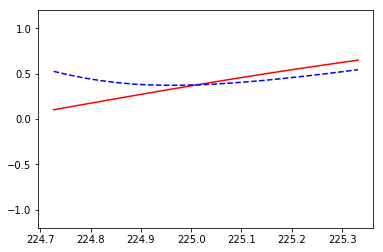

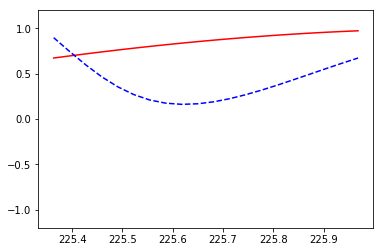

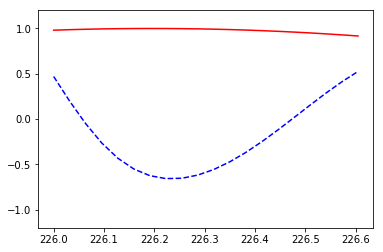

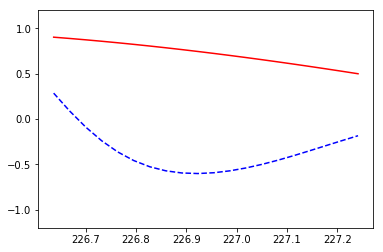

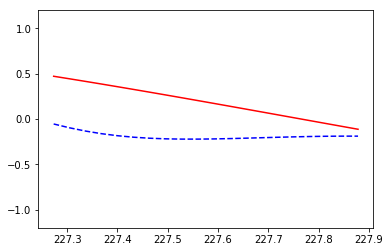

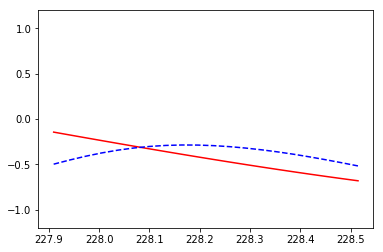

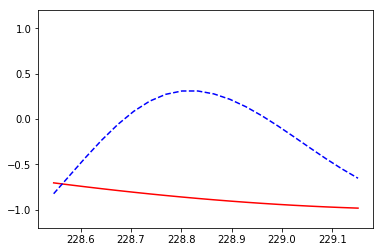

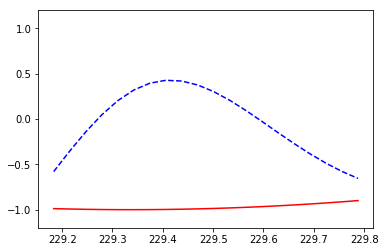

train cost:  0.015752373


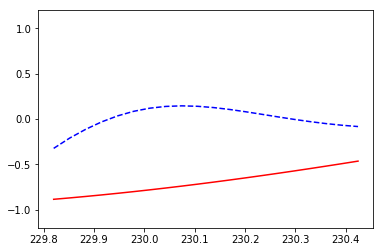

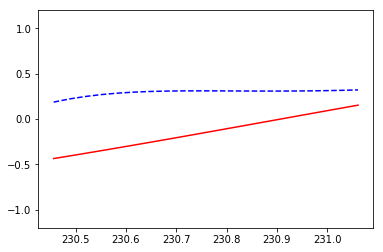

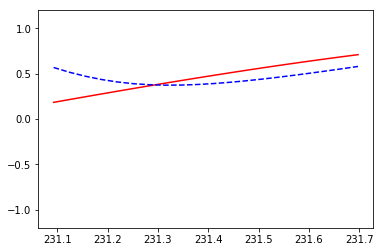

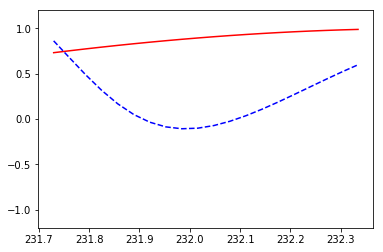

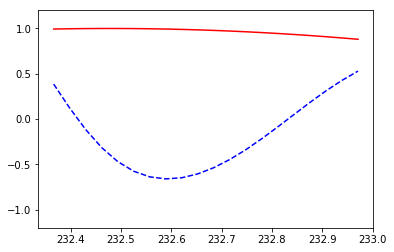

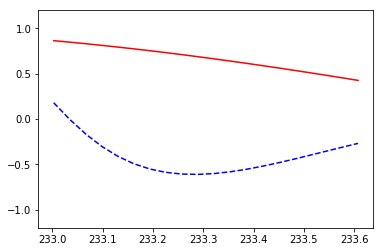

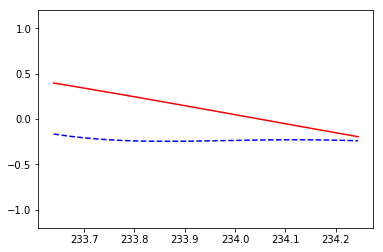

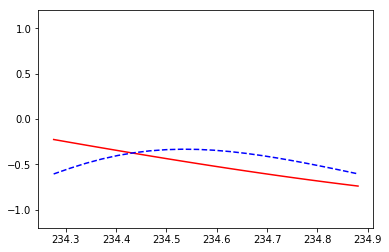

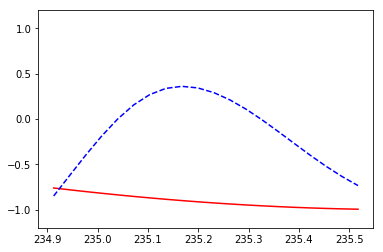

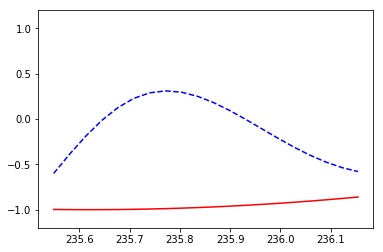

train cost:  0.017596086


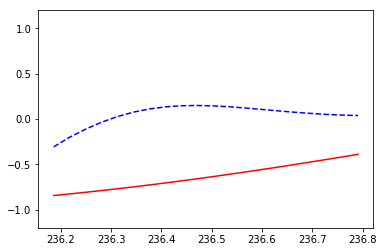

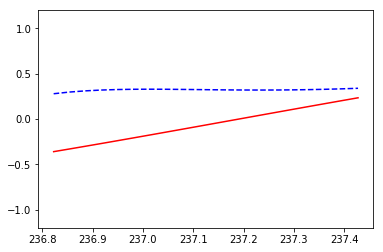

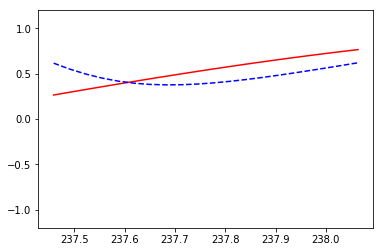

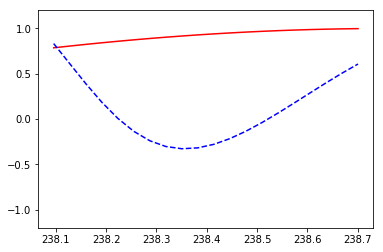

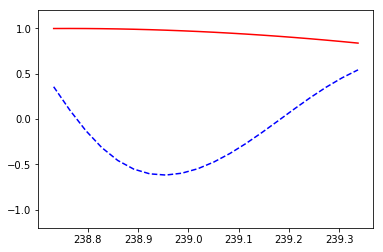

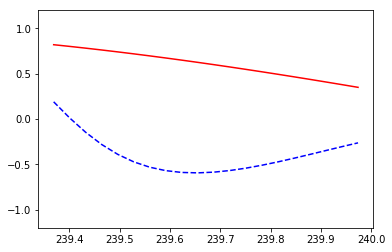

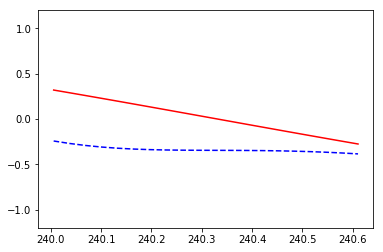

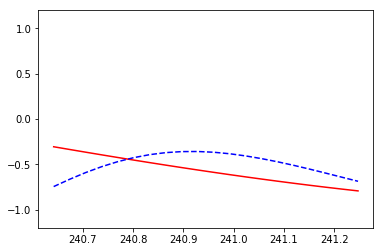

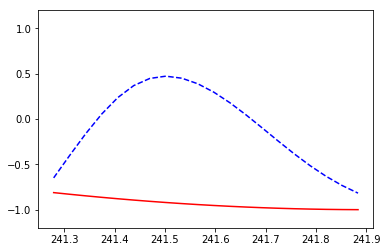

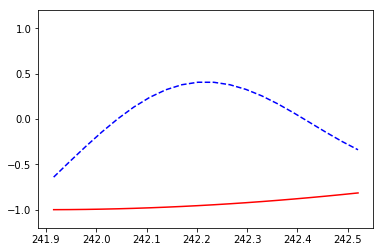

train cost:  0.01650771


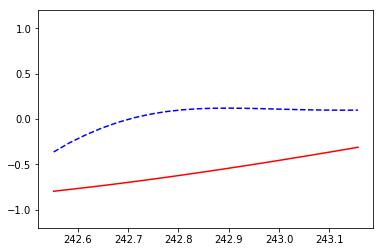

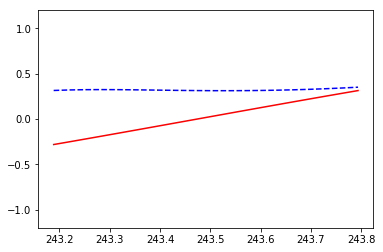

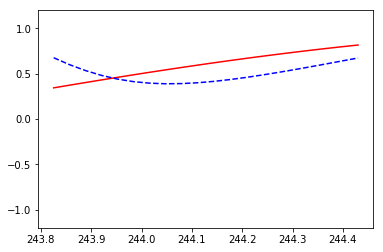

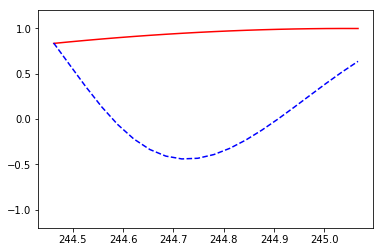

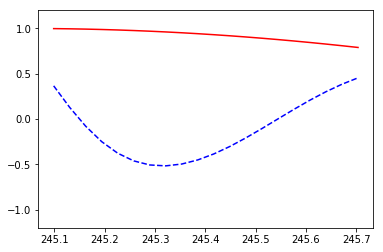

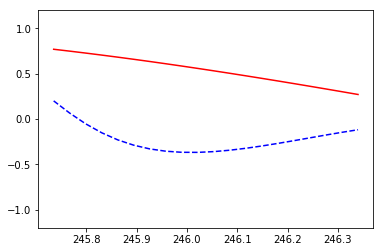

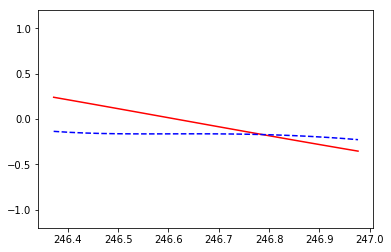

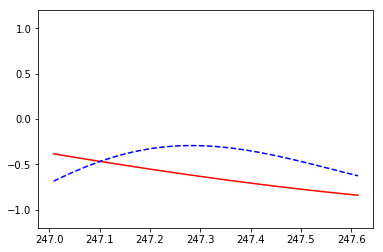

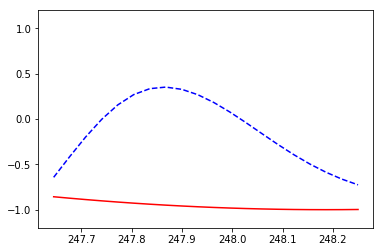

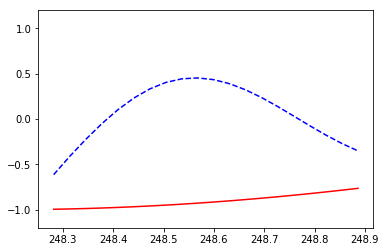

train cost:  0.012289799


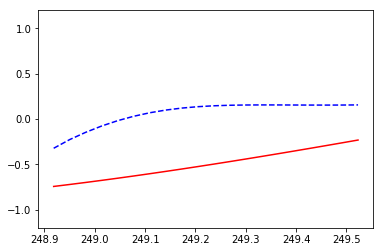

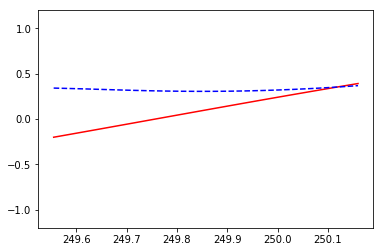

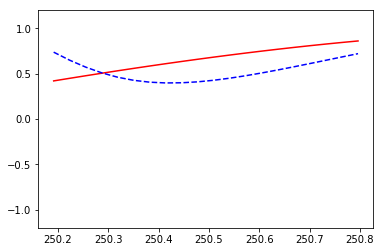

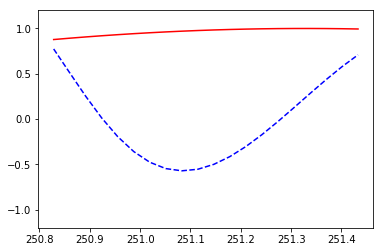

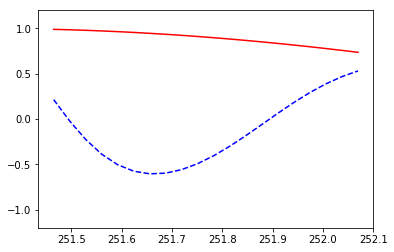

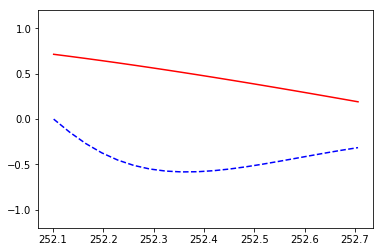

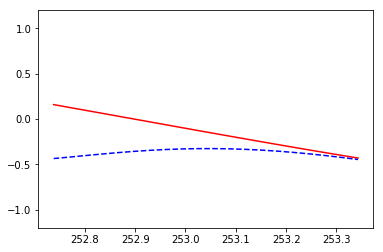

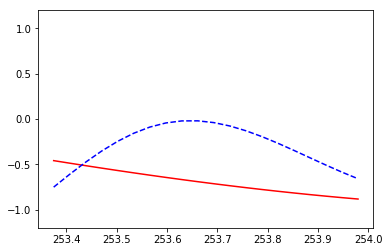

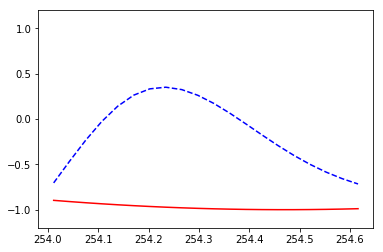

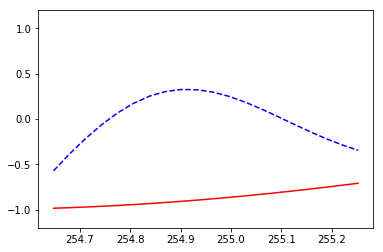

train cost:  0.00898072


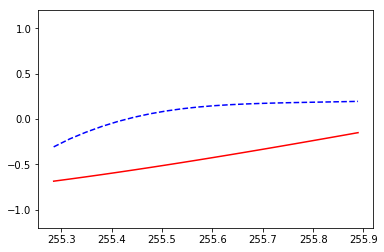

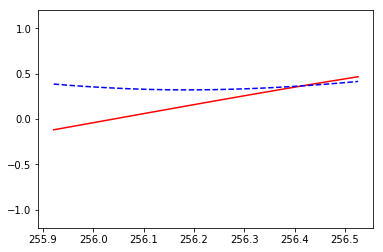

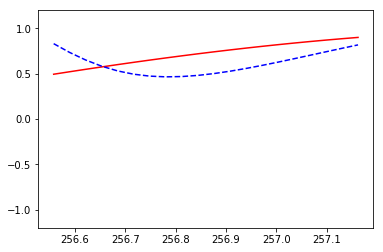

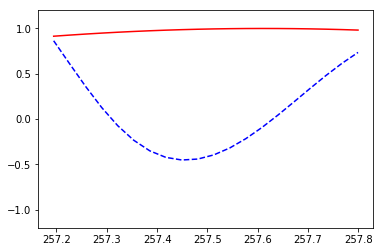

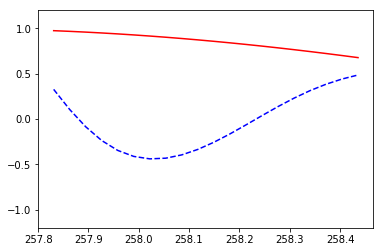

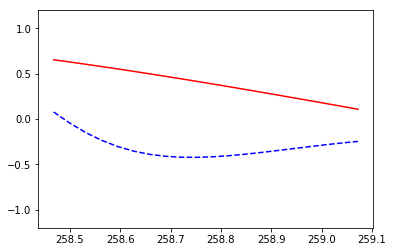

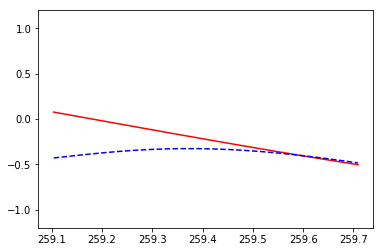

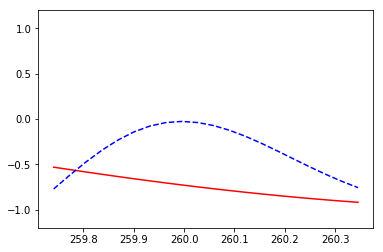

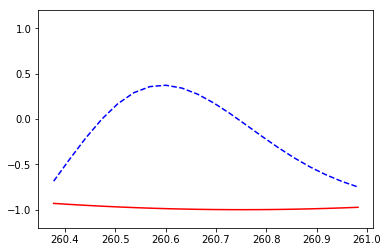

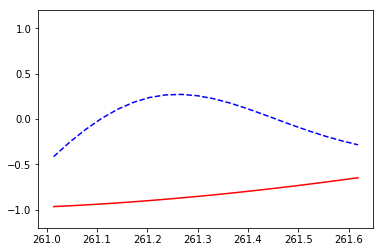

train cost:  0.01008811


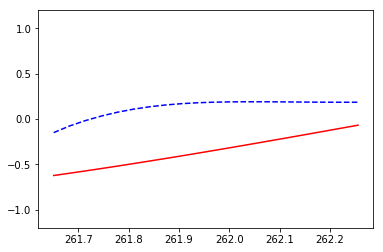

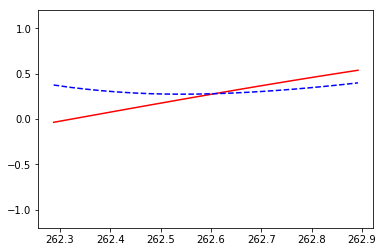

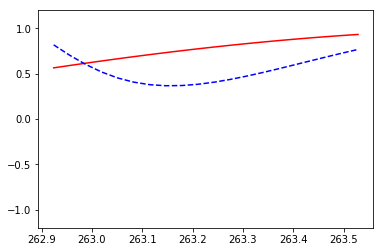

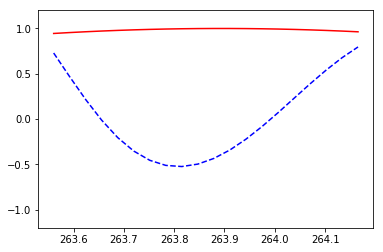

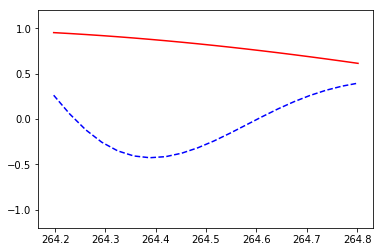

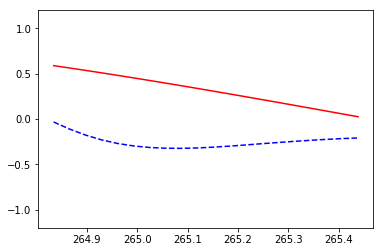

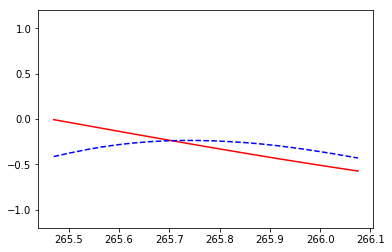

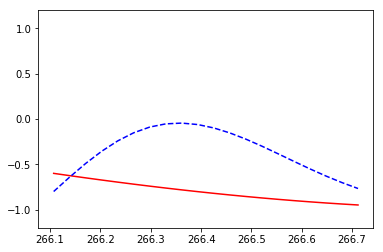

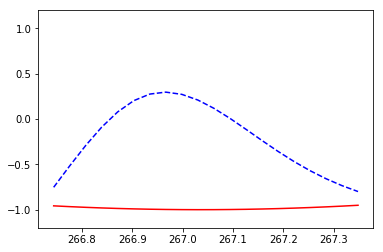

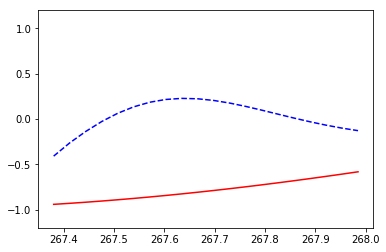

train cost:  0.011632775


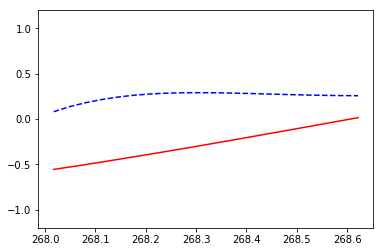

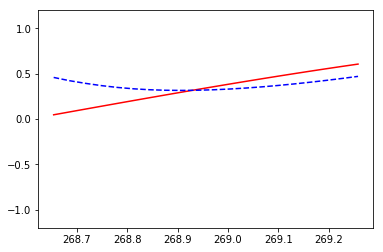

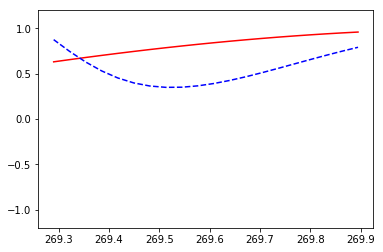

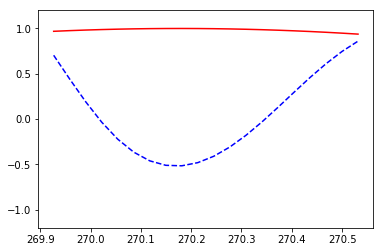

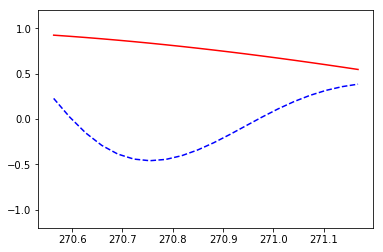

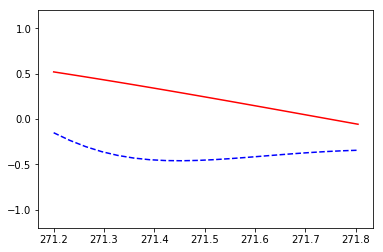

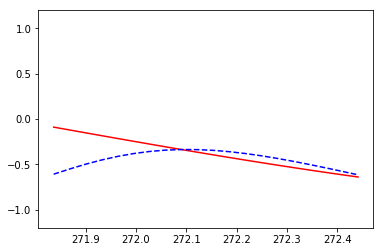

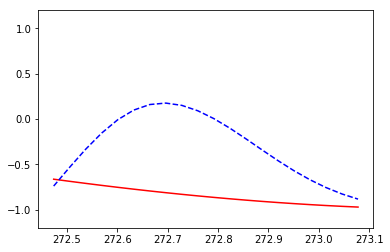

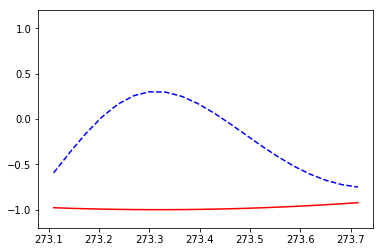

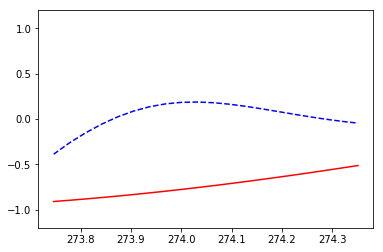

train cost:  0.011759143


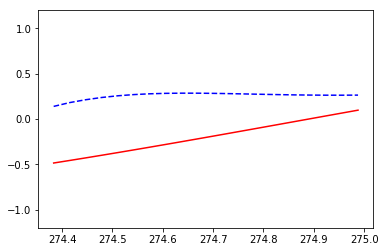

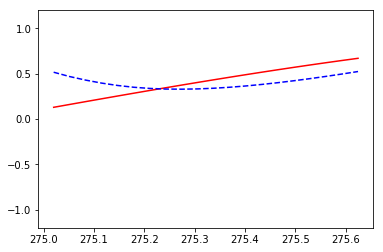

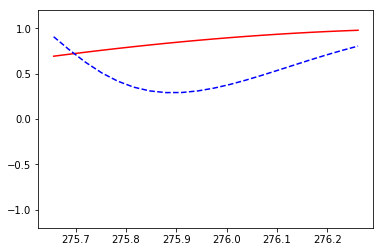

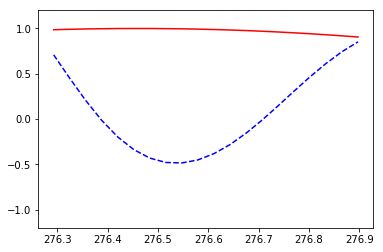

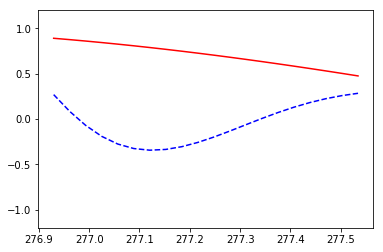

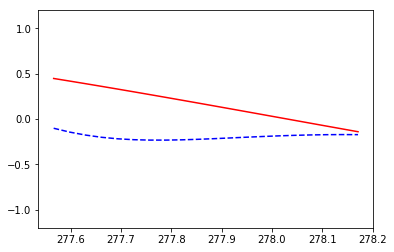

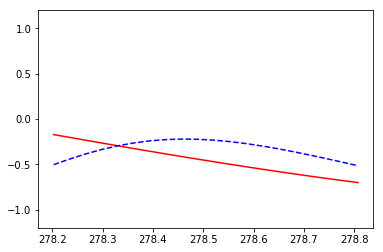

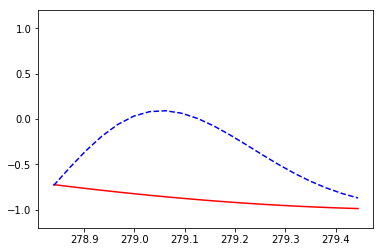

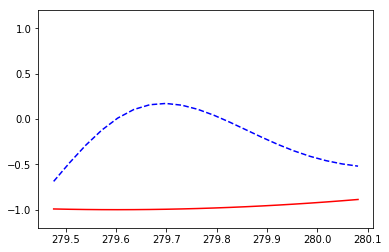

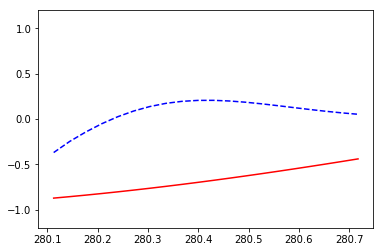

train cost:  0.012401259


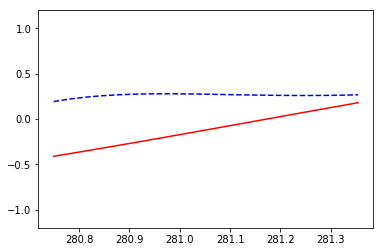

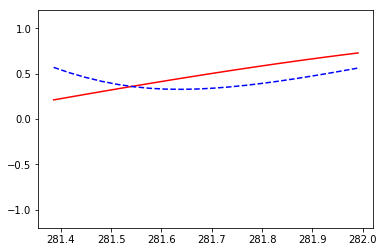

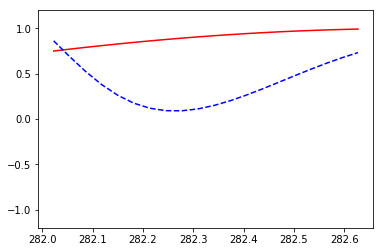

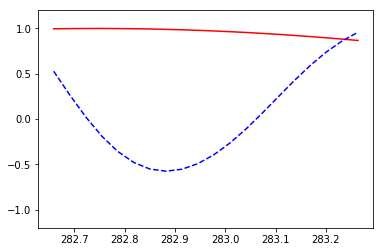

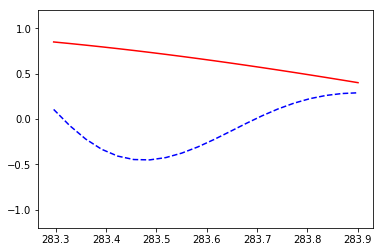

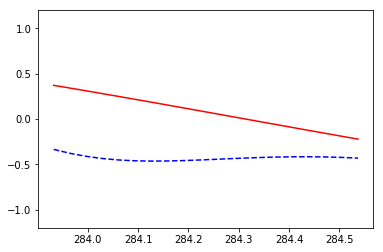

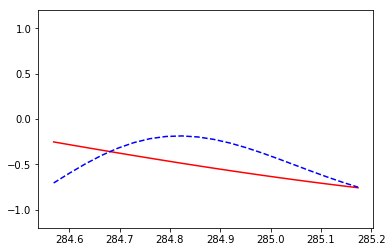

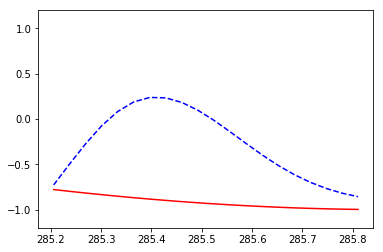

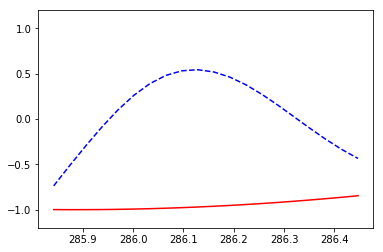

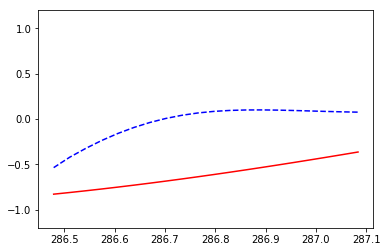

train cost:  0.009969231


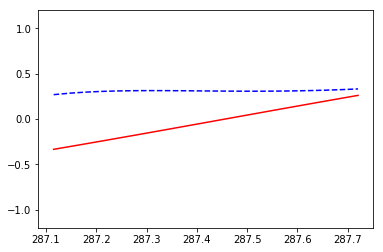

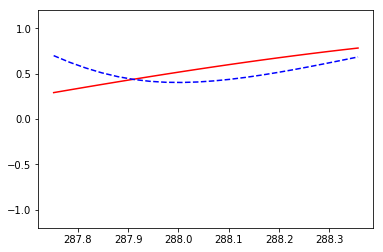

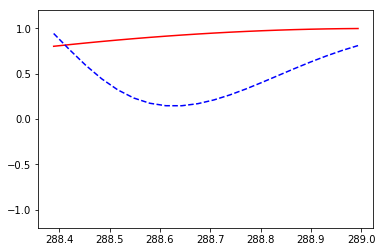

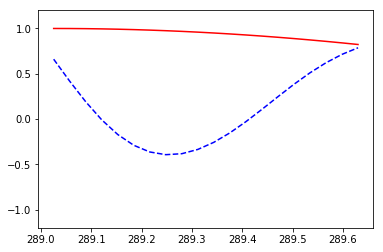

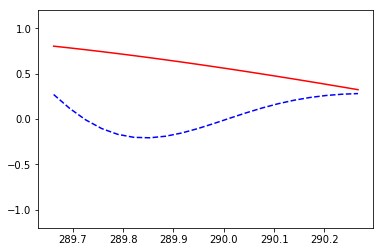

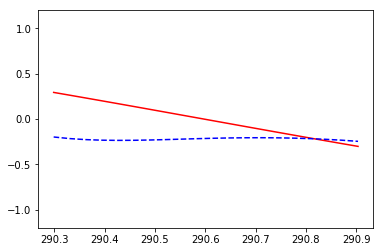

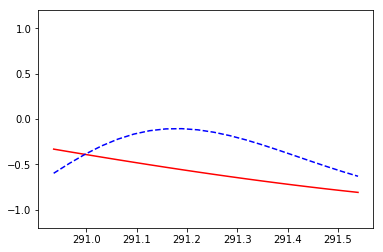

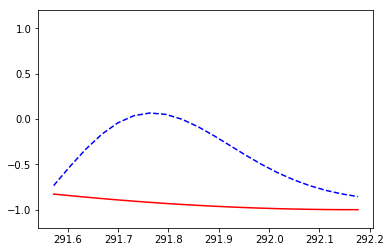

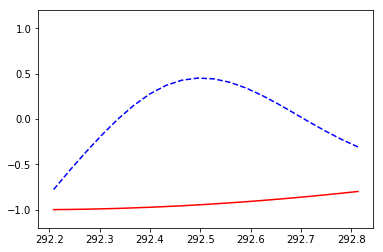

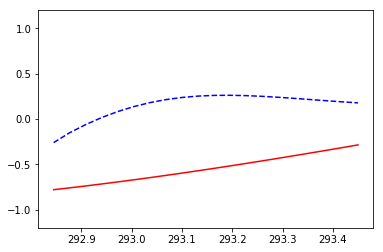

train cost:  0.0113338055


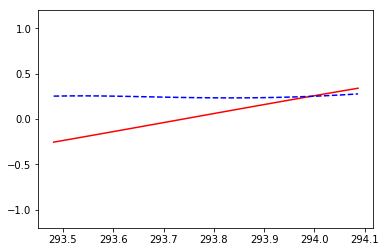

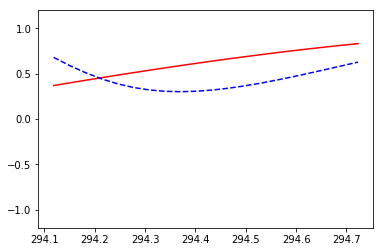

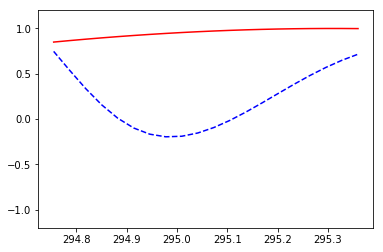

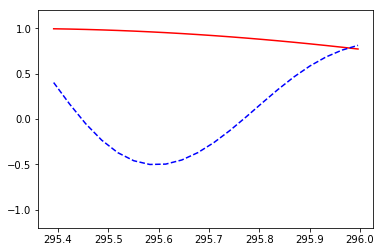

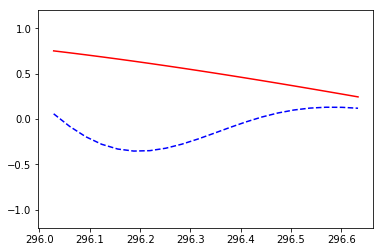

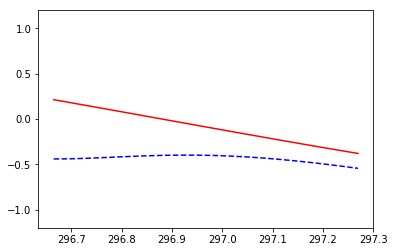

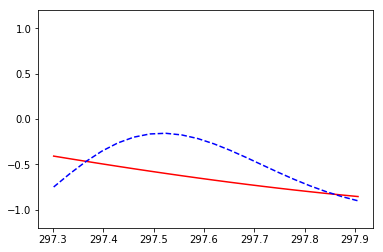

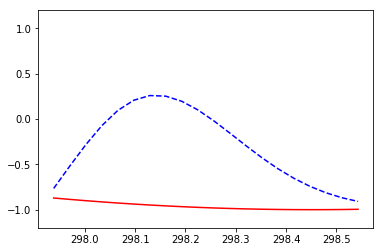

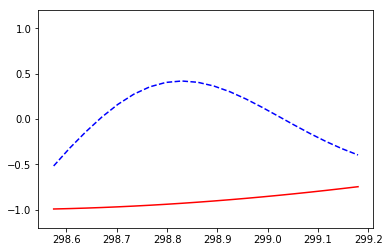

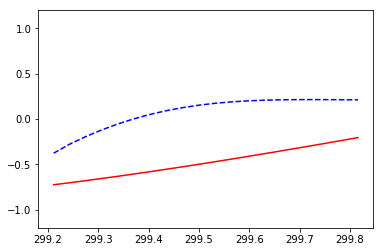

train cost:  0.009857452


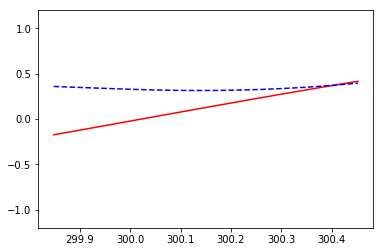

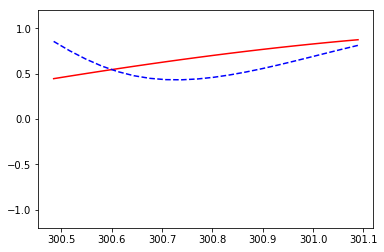

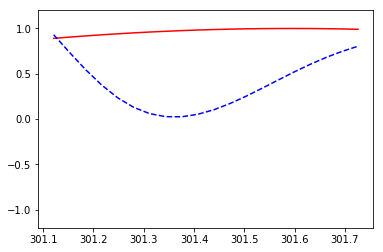

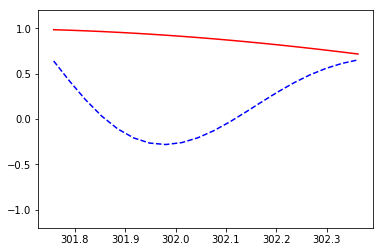

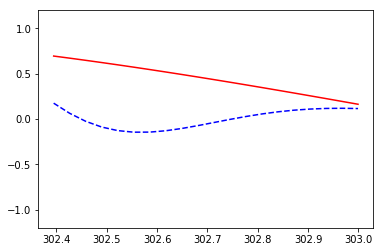

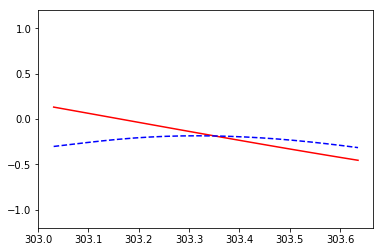

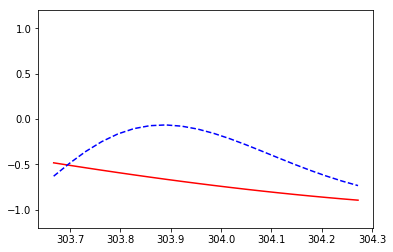

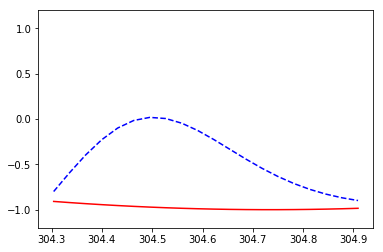

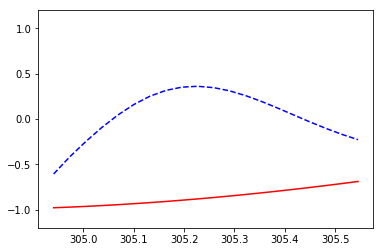

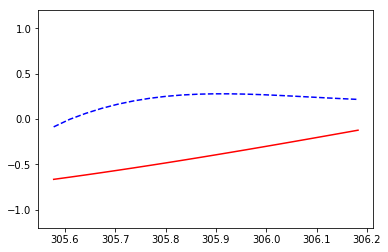

train cost:  0.011531882


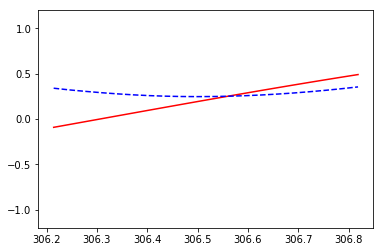

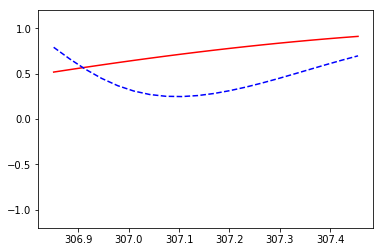

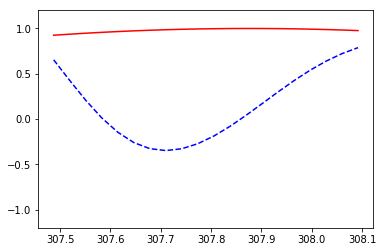

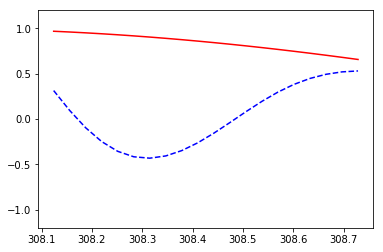

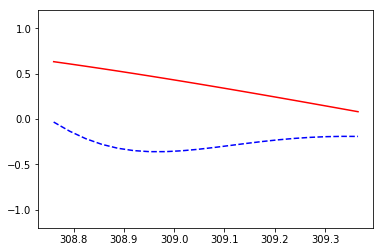

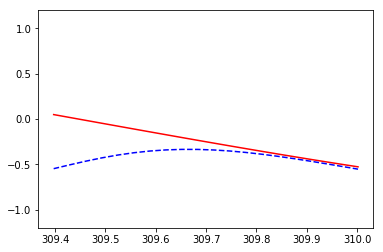

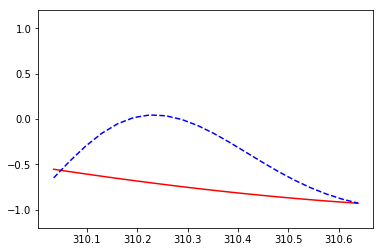

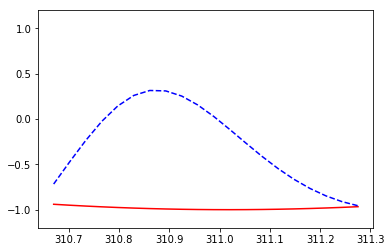

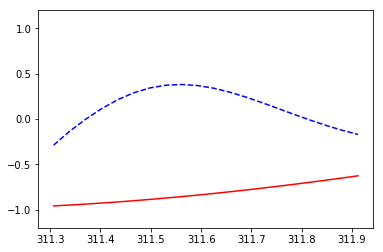

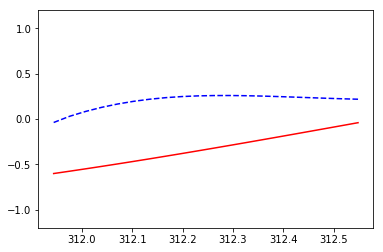

train cost:  0.012656828


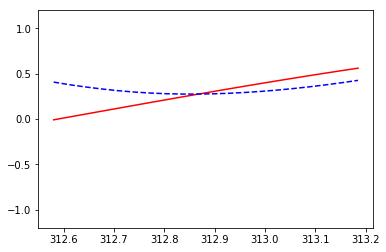

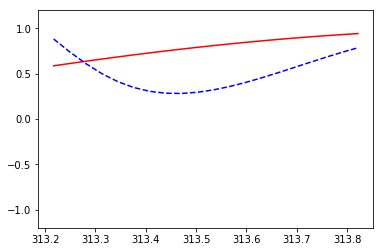

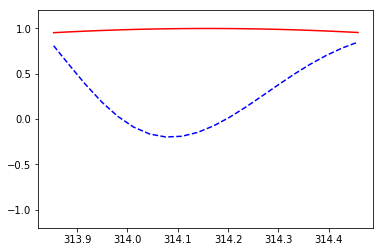

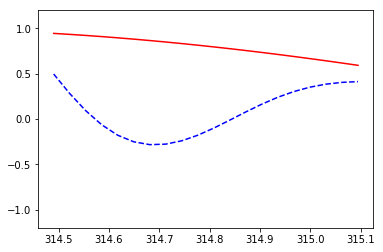

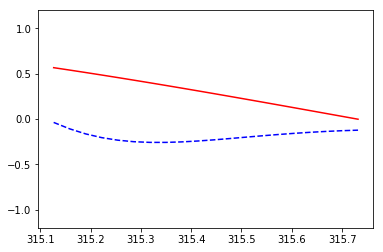

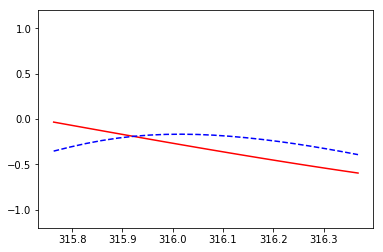

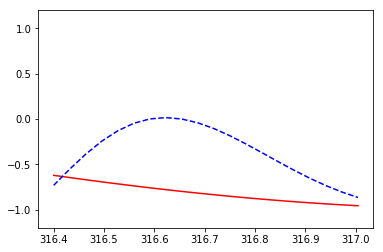

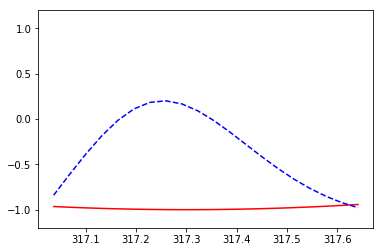

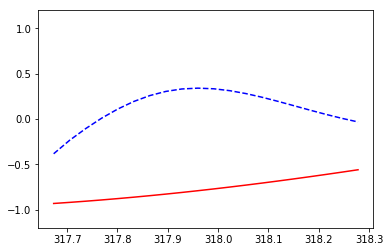

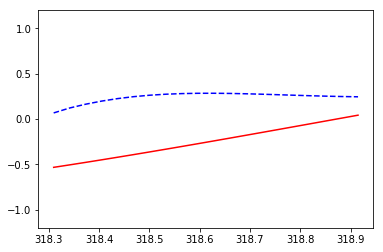

train cost:  0.012069209


In [4]:
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)